# Исследование объявлений о продаже квартир 🏡

В нашем распоряжении данные сервиса Яндекс.Недвижимость, представляющие собой архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цели исследования**

1. Выявить проблемы в данных и устранить их при помощи различных методов
2. Подготовить данные для их использования в ходе построения автоматизированной системы
3. Установить закономерности во влиянии различных факторов, характеризующих объекты недвижиости, на конечную цену объектов, описать их в общем выводе

**Ход исследования**

Данные получу со следующего веб-ресурса: [real_estate_data.csv](https://code.s3.yandex.net/datasets/real_estate_data.csv). О их качестве ничего не известно, есть только документация к столбцам, поэтому потребуется обзор данных.

Данные будут проверены на ошибки. В ходе этапа предобработки будут исправлены найденные проблемы, которые могут привести к неправильным выводам и результатам.

В следующем шаге будут добавлены новые столбцы, в которых будут доп характеристики каждого из объектов.

После добавления уточняющих столбцов произведем исследование вопросов взаимосвязи различных величин с конечной рыночной ценой объекта.

***Резюмируя***, исследование пройдет в пять основных этапов:

- Обзор данных
- Предобработка данных
- Добавление столбцов с дополнительными данными
- Проведение анализа влияния различных факторов на рыночную стоимость объектов. Уточнение особенностей каждого из них.
- Подведение итогов, рекомендации по улучшению проекта

### Шаг 1. Ознакомление с исходными данными 🧐

Откроем файл с данными и изучим общую информацию о нем.

Импортируем необходимые библиотеки

In [1]:
%pip install transliterate -U

Note: you may need to restart the kernel to use updated packages.


Основные

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Дополнительные

In [3]:
from pprint import pprint
from transliterate import translit
from typing import Callable, List
import warnings

Установим параметры по умолчанию для полноценного отображения датафреймов в `pandas`

In [4]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 50)

warnings.filterwarnings('ignore') # Убираем показ предупреждений

Прочитаем данные.

В случае отстутствия данных в локальной папке проекта получим их с соответствующего веб-ресурса.

In [5]:
filename = 'real_estate_data.csv'
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/{}'.format(filename), sep='\t')
except:
    data = pd.read_csv(filename, sep='\t')

#### Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Для корректного чтения данных потребовалось использовать параметр `sep` со значением `\t`

Выведем первые 10 строк прочитанного датасета методом `head()`, а также рассмотрим общую сводку по всем данным, применив метод `info()`.


In [6]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Сразу же видно, что в некоторых столбцах количество непустых ячеек не совпадает с общим кол-вом строк в датасете.  Возможно, причина этого в том, что нулевые значения заменялись на NaN или при составлении исходных данных возникли ошибки. Разберемся с этим на этапе предобработки.

По конкретным столбцам пока можно выделить следующие проблемы:
- Неверные типы данных в столбцах:
    - `first_date_exposition` (хранится время, а тип данных - `object`);
    - `is_apartment` (по смыслу тип данных - `bool`, но в данный момент `object`);
- Название 17-ого столбца `cityCenters_nearest` записано не по правилам;

Построим гистограмму по всему датафрейму, для того чтобы подробнее рассмотреть возможнные проблемы в распределении числовых данных в исходных данных.

Для этого воспользуемся методом `hist()` из библиотеки `pandas`. Зададим размер графика, передав аргумент `figsize`.

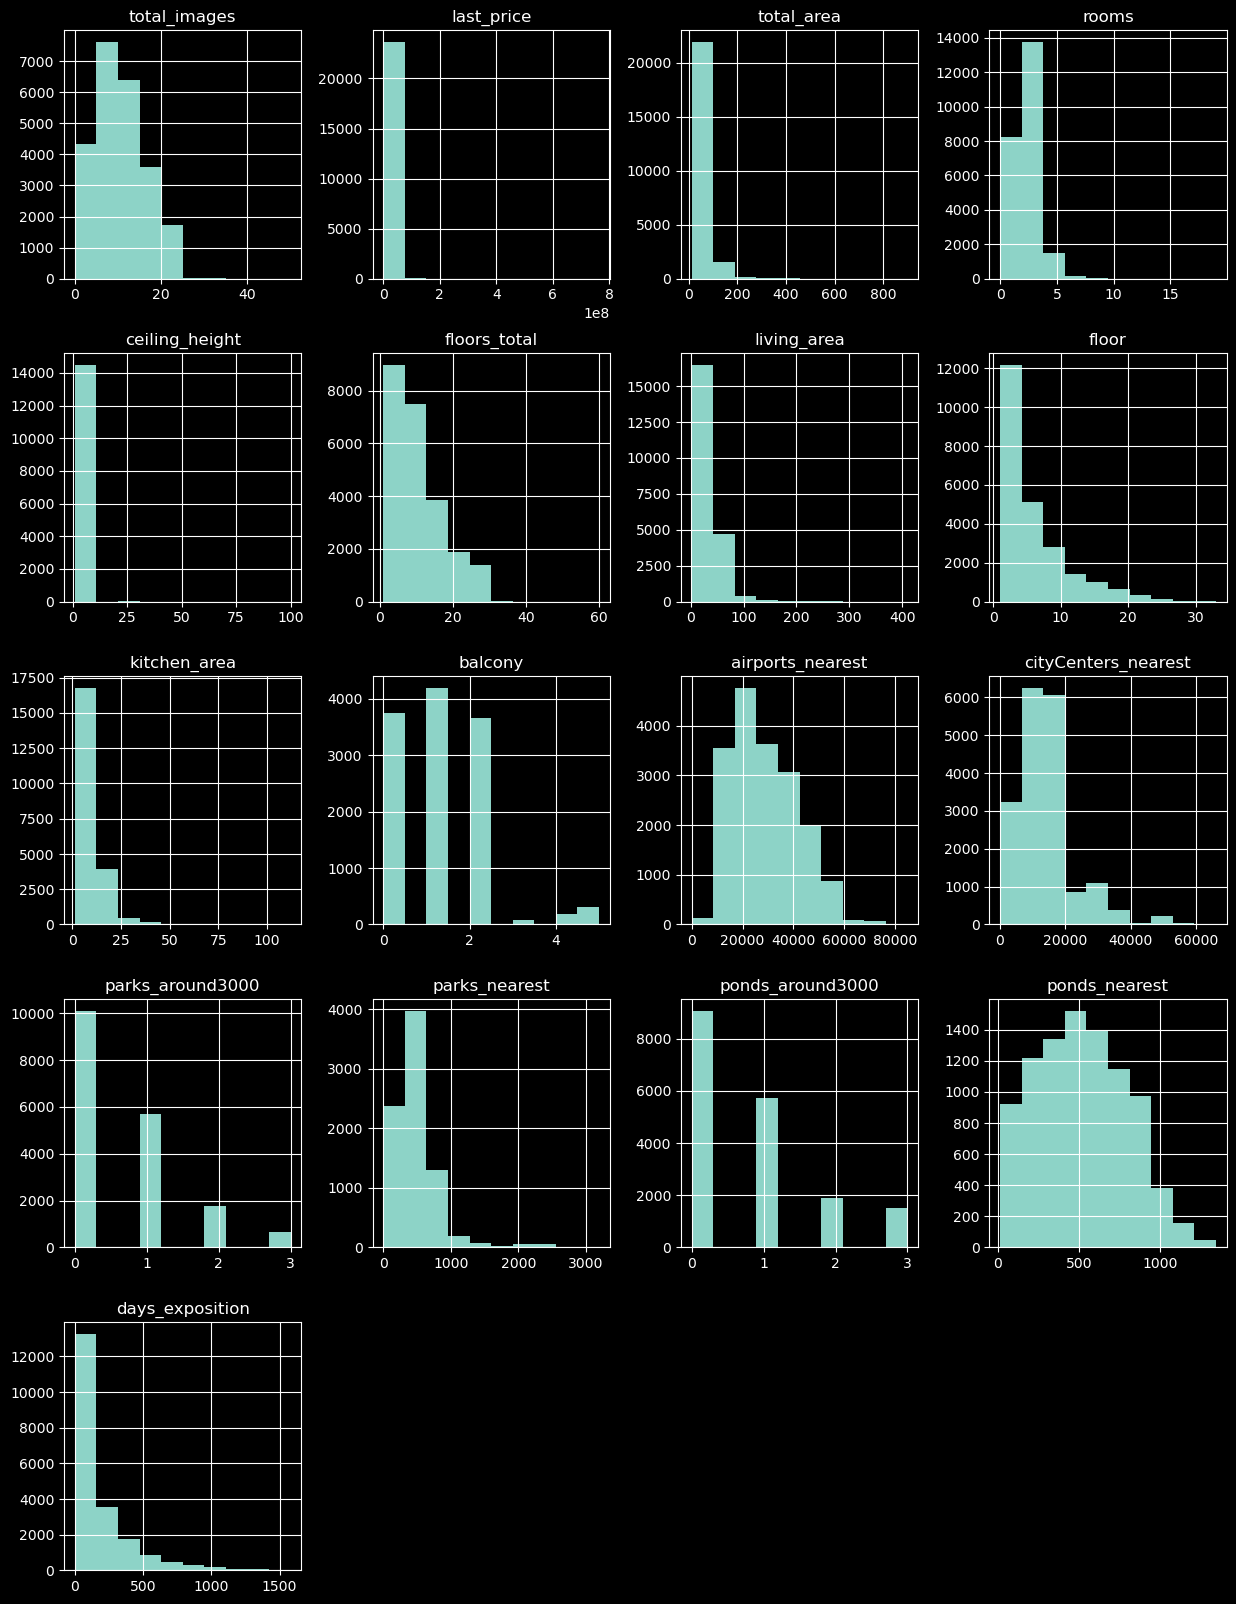

In [8]:
data.hist(figsize=(15, 20))
plt.show() # Используем, чтобы не выводилась служебная информация

В дополнение стоит взглянуть на описательную статистику по значениям датафрейма.

In [9]:
np.round(data.describe(), 1).T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.9,5.7,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,6541548.8,10887013.3,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,60.3,35.7,12.0,40.0,52.0,69.9,900.0
rooms,23699.0,2.1,1.1,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,2.8,1.3,1.0,2.5,2.6,2.8,100.0
floors_total,23613.0,10.7,6.6,1.0,5.0,9.0,16.0,60.0
living_area,21796.0,34.5,22.0,2.0,18.6,30.0,42.3,409.7
floor,23699.0,5.9,4.9,1.0,2.0,4.0,8.0,33.0
kitchen_area,21421.0,10.6,5.9,1.3,7.0,9.1,12.0,112.0
balcony,12180.0,1.2,1.1,0.0,0.0,1.0,2.0,5.0


#### Краткий вывод

Исходные данные содержат 22 столбца и почти 24 тыс. строк с информацией об объектах недвижимости.

В данных видны типичные проблемы:
- Некорректные названия столбцов
- Столбцы с пропущенными значениями, возникшие по незвестным причинам
- Столбцы, хранящие значения с неверным типом данных.

Перейдем к этапу **предобработки данных** для исправления вышеперечисленных проблем.

### Шаг 2. Предобработка данных ♻️

___

#### Переименование столбцов

Начнем с того, что переименуем столбец `cityCenters_nearest` в соответствии с *"змеиным регистром".*

In [10]:
data.rename(
    columns={'cityCenters_nearest' : 'city_centers_nearest'}, 
    inplace=True
)
data.columns # Проверим изменения

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

___

#### Изменение типов данных

##### Изменим тип данных в столбце `first_day_exposition` c `object` на `datetime`

Для этого перезапишем значения в столбце с корректным типом данных путем применения метода `to_datetime()`

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.first_day_exposition.head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

___

#### Работа с пропущенными значениями

Выведем сводку по пропускам в датафрейме.

Воспользуемся комбинацией методов `isna()` и `sum()`

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Довольно большое кол-во столбцов, в которых имеются пропущенные значения.

В некоторых столбцах содержаться пропуски, связаные с тем, что продавец не указал соответствующую информацию. Но постараемся их заполнить позднее.

Для заполнения пропусков в столбцах с картографическими данными (от `airports_nearest` до `ponds_nearest`) недостаточно информации о точном местонахождении каждого из объектов недвижимости. Если потребуется использовать эти данные в дальнейшем исследовании, то разберемся с этим позднее.

Поэтому пока также не будем заполнять в них пропуски.

Пока сконцентрируем усилия на обработке пропусков в этих столбцах:

> `ceiling_height`

> `is_apartment`

> `balcony`

> `locality_name`

Перейдем непосредственно к устранению пропусков в вышеперечисленных столбцах!

## 👨🏽‍💻👇🏼

___

Для удобства была введена функция `missing_columns_remaining`. Она красивенько выводит на экран список столбцов, в которых остались пропуски и их количество.

In [13]:
def missing_columns_remaining():
    pprint(
        [(column,  data[column].isna().sum()) for column in data.columns if data[column].isna().sum()]
    )
missing_columns_remaining()

[('ceiling_height', 9195),
 ('floors_total', 86),
 ('living_area', 1903),
 ('is_apartment', 20924),
 ('kitchen_area', 2278),
 ('balcony', 11519),
 ('locality_name', 49),
 ('airports_nearest', 5542),
 ('city_centers_nearest', 5519),
 ('parks_around3000', 5518),
 ('parks_nearest', 15620),
 ('ponds_around3000', 5518),
 ('ponds_nearest', 14589),
 ('days_exposition', 3181)]


___

##### Разберемся с пропущенными значениями в столбце `is_apartment`.

Столбец характеризует то, является ли недвижимость апартаментами. По идее, всего должно быть два значения - `True` или `False`.

Выясним, как обстоят дела с пропусками. 

Для этого вызовем метод `value_counts()` с аргументом `dropna` в значении `False`.

In [14]:
apart_counts = data.is_apartment.value_counts(dropna=False)
apart_counts

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Посмотрим, что за собой скрывают объявления, где `is_apartment` равно `True`

In [15]:
data.query('is_apartment == True').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06,2,3.50,3.0,29.40,1,True,False,False,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11,2,3.12,3.0,40.00,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09,2,NaN,6.0,58.30,5,True,False,False,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30,1,NaN,9.0,NaN,1,True,False,False,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27,3,3.00,3.0,NaN,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.9,2018-07-23,1,3.15,4.0,20.39,3,True,False,False,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.0,2018-09-08,2,4.50,7.0,45.00,7,True,False,False,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.1,2016-05-16,1,NaN,13.0,19.80,6,True,False,False,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.0,2019-04-20,1,3.00,11.0,17.00,9,True,False,False,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.0,2019-03-25,3,3.50,4.0,70.00,1,True,False,False,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [16]:
print('Доля тех, кто не указывает тип собственности равна: {:.2%}'
        .format( 
            (apart_counts[0] / sum(apart_counts))
    )
)

Доля тех, кто не указывает тип собственности равна: 88.29%


Судя по небольшому расстоянию до центра в некоторых из таких объявлений, а также приличной стоимости, значение в столбце `is_apartment` характеризует недвижимость премиального сегмента (об этом также может говорить небольшое кол-во таких объявлений).

Но однозначно сделать вывод о том, что характеризует этот признак в исходных данных нельзя, так как слишком мало объявлений, где этот параметр принимает не пустое значение (12% всех объявлений).

В любом случае, пользуясь вышеописанной информацией временно заполним пропуски значением `False` и уточним точно что под собой подразумевает этот параметр, а также сообщим о большом кол-ве пропущенных значений.



In [17]:
data.is_apartment.fillna(value=False, inplace=True)
data.is_apartment.value_counts(dropna=False)

False    23649
True        50
Name: is_apartment, dtype: int64

##### Разберемся с пропусками в столбце `balcony`

Для начала посчитаем долю пропущенных значений в этом столбце.

In [18]:
print('{:.2%}'.format(data.balcony.isna().sum() / len(data.balcony)))

48.61%


Более `48%` пропусков, стоит уточнить их природу.

Дополнительно взглянем на все уникальные значения.

In [19]:
data.balcony.value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Судя по тому, что `0` уже есть, то `NaN` может обозначать все что угодно.

Но пока предположим, что `NaN` обозначает, то что автор объявления не указал кол-во балконов => изменим такие значения на `0`

Еще одна из проблем в исходных данных найдена, поэтому сообщим о ней отделу разработки.

In [20]:
data.balcony.fillna(value=0, inplace=True)
data['balcony'] = data['balcony'].astype(int)
data.balcony.value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

___

#### Устранение дубликатов

##### Обработаем неявные дубликаты в столбце `locality_name` и заменим пропуски в нем

В этом столбце есть названия, которые дублируют друг друга по смыслу, но при этом строки не одинаковые.

Например, `посёлок мурино` и `мурино`. Такие названия разумно исключить, выбрав один из вариантов для всех последующих названий одного и того же места.

Начнем с того, что стоит заполнить пропущенные значения строкой `не указано`, поскольку указать `санкт-петербург` было бы отчасти верным решением, но все равно такое допущение может повлиять на результаты. 

**К примеру**, какой-то населенный пункт имеет такооое длинное название, что оно просто не поместилось в поле месторасположения объекта в объявлении. Поэтому причину этих пропусков стоит уточнить у коллег, предоставивших данные.

Приведем все уникальные названия в столбце к нижнему регистру для удобства работы. Используем следующую комбинацию: `str.lower()`. Заполним пропуски, проверим результат.

In [21]:
data['locality_name'] = data['locality_name'].str.lower()
print('Кол-во пропусков до замены - ' + str(data.locality_name.isna().sum()))
data.locality_name.fillna('не указано', inplace=True)
print('Кол-во пропусков после замены - ' + str(data.locality_name.isna().sum()))

Кол-во пропусков до замены - 49
Кол-во пропусков после замены - 0


In [22]:
data['locality_name'] = data.locality_name.astype('str')

**Отлично!**

Выясним изначальное количество уникальных строк в этом столбце. Применим метод `nunique()`.

In [23]:
data['locality_name'].nunique()

365

Итак, изначально у нас **365** уникальных строк.

Для удаления неявных дубликатов воспользуемся списком с различными приписками к названиям населенных пунктов. В нем заменим все типы на `поселок`, `санкт-петербург` оставим как есть.

Получить точный список со всеми типами населенных пунктов задача непростая, поэтому напишем цикл для получения 'приблизительного' результата и вручную составим необходимый список.

Заменим все буквы `ё` на `е`

In [24]:
data['locality_name'] = data.locality_name.str.replace('ё', 'е', regex=True) # Заменим все буквы 'ё' на 'е'

Составим примерный **список префиксов** населенных пунктов

In [25]:
# Занесем в переменную все уникальные 
# значения столбца locality_name на данный момент 
all_locations = data.locality_name.str.lower().unique()
all_locations

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [26]:
substrings_to_remove = list()

for i in range(5, 1, -1): # Итерации по убыванию длины названия
    for location in all_locations: # Проходим по каждому из названий
        if len(str(location).split(' ')) > i: 
            # Отсекаем ненужное (немного криво, ну, а что поделать. Не мы такие, данные такие :) )
            substrings_to_remove.append(' '.join(str(location).split(' ')[:(i-1)]))

substrings_to_remove = set(substrings_to_remove)
substrings_to_remove

{'городской',
 'городской поселок',
 'деревня',
 'коттеджный',
 'коттеджный поселок',
 'поселок',
 'поселок городского',
 'поселок городского типа',
 'поселок пансионат',
 'поселок платформа',
 'поселок при',
 'поселок при железнодорожной',
 'поселок форт',
 'садоводческое',
 'садоводческое некоммерческое',
 'садоводческое некоммерческое товарищество',
 'садовое',
 'садовое товарищество',
 'село'}

Результат не идеален, но при этом видно какие приписки в принципе существуют. Немного доработаем результат вручную и занесем его в список `prefixes`.

In [27]:
prefixes = [
            'поселок при железнодорожной станции',
            'садоводческое некоммерческое товарищество',
            'поселок',
            'садовое товарищество',
            'коттеджный поселок',
            'городской поселок', 
            'деревня',  
            'посeлок городского типа', 
            'село',
        ]

Что ж, теперь нам требуется разделить название населенного пункта с его типом...

Задача нетривиальна, так как требуется различить две этих подстроки в одной. 

После долгих раздумий написали следующий алгоритм:

In [28]:
# Создадим пустой список
settlement_dict = {}

# Проходим циклом по всем на данный момент уникальным названиям
for settlement in all_locations:
    # Вынужденно используем транслитерацию, 
    # так как в некоторых названиях буква 'е' - английская. 
    # Спасибо за -2 часа времени!
    settlement = translit(settlement, 'ru') 
    # Проходимся циклом по каждому из префисков
    for prefix in prefixes:
        # Если название населенного пункта начинается с префикса
        if settlement.startswith(prefix):
            # Условие на 'поселок городского типа', 
            # так как без него работает некорректно
            if prefix == 'поселок' and settlement.startswith('поселок городского типа'):
                # Записываем название населенного пункта без приписки
                name = settlement[len(prefix)+17:].strip()
                # Добавляем 'название населенного пункта' : 'его тип' 
                # в словарь settlement_dict
                prefix = 'поселок городского типа'
                settlement_dict[name] = prefix
                break
            else: # Иначе просто отсекаем префикс и также заносим в словарь
                name = settlement[len(prefix):].strip()
                settlement_dict[name] = prefix
                break
    else: # Если префикс отсутствует, то никак не ассоциируем название
        settlement_dict[settlement] = '' 

pprint(settlement_dict) # Результат. ура...

print(f'\nКол-во значений после удаления неявных дубликатов - {len(settlement_dict)}')

{'агалатово': 'деревня',
 'александровская': 'поселок',
 'алексеевка': 'поселок',
 'аннино': 'поселок',
 'аро': 'деревня',
 'барышево': 'поселок',
 'батово': 'деревня',
 'бегуницы': 'деревня',
 'белогорка': 'деревня',
 'белоостров': 'поселок',
 'бокситогорск': '',
 'большая вруда': 'деревня',
 'большая ижора': 'поселок городского типа',
 'большая пустомержа': 'деревня',
 'большие колпаны': 'деревня',
 'большое рейзино': 'деревня',
 'большой сабск': 'деревня',
 'бор': 'деревня',
 'борисова грива': 'деревня',
 'бугры': 'поселок',
 'будогощь': 'городской поселок',
 'ваганово': 'деревня',
 'важины': 'поселок городского типа',
 'вартемяги': 'деревня',
 'вахнова кара': 'деревня',
 'вещево': 'поселок при железнодорожной станции',
 'виллози': 'городской поселок',
 'вознесенье': 'поселок городского типа',
 'возрождение': 'поселок',
 'войсковицы': 'поселок',
 'войскорово': 'поселок',
 'володарское': 'поселок',
 'волосово': '',
 'волхов': '',
 'всеволожск': '',
 'выборг': '',
 'вырица': 'поселок 

Наконец-таки мы избавились от этих **злосчастных** дубликатов! Теперь названий чуть меньше, так как одинаковые исключены - в словарь попали только последние из всех вхождений. Т.е. если было название 'поселок мурино', а потом 'мурино', то по ключу 'мурино' типа населенного пункта не будет.
 
Оказывается в данных могут быть "подлянки" в виде различных букв типа 'е' или 'ё', а также крайне неприятные незаметные сочитания русских и английских букв. P.s. может быть связано с тем, что использую MacBook :)

Результат занесли в словарь `settlement_dict`

Теперь воспользуемся данными из созданного словаря и заменим соответствующие название теми же, но уже без повторов и прочих проблем.

In [29]:
def rename_location(old_name):
    old_name = str(old_name).strip() # Точно удалим все лишние символы в названии
    for name, location_type in settlement_dict.items():
        if name in old_name:
            if settlement_dict[name] == location_type:
                new_name = f'{location_type} {name}'.strip()
                return new_name
            elif settlement_dict[name] == '':
                if np.isnan(old_name):
                    new_name = 'не указано'
                    return new_name
                new_name = name.strip()
                return new_name

data['new_locality_name'] = data['locality_name'].apply(rename_location)
data.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,False,False,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок шушары
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,False,False,9.10,0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,городской поселок янино-1
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,False,False,14.40,1,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,поселок парголово
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,санкт-петербург
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,False,False,8.81,0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,мурино
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,санкт-петербург


In [30]:
data.locality_name.value_counts(sort=True).head(10) # топ-10 самых часто встречаемых локаций

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [31]:
data.new_locality_name.isna().sum()

0

___

### Устранение аномальных значений

#### Устранение аномальных значений в столбце `floors_total`

In [32]:
sorted(data.floors_total.unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 nan,
 28.0,
 29.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 52.0,
 60.0]

Присутствует несколько аномальных значений.

Согласно информации из Интернета, самое высокое жилое здание в Санкт-Петербурге имеет высоту в 35 этажей.

Следовательно, удалим те объявления, где общая высота жилого здания больше этого значения.

In [33]:
to_drop = data.query('floors_total > 35')
data.drop(index=to_drop.index, inplace=True)
print('Было удалено {} объявлений, где общее кол-во этажей здания более 35'.format(len(to_drop)))

Было удалено 6 объявлений, где общее кол-во этажей здания более 35


#### Устранение аномальных значений в столбце `celling_height`

Как известно, в этом столбце более 9000 тыс. пропущенных значений.

Для начала посмотрим на квартили, медиану и размах (min и max) среди тех значений высоты, которые уже указаны. 

Это поможет понять какие значения неверные и выбивающиеся. 

Для этого воспользуемся методом `describe()`

In [34]:
ceiling_height_description = data['ceiling_height'].describe()
ceiling_height_description

count    14499.000000
mean         2.769904
std          1.245088
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

**Медианная** высота - `2.65`. Это, вероятно, метры. Звучит правдоподобно.

**Минимум** - `1 м`, а **максимум** - `100 м`. Быть ли карликом или гигантом никто не выбирает, но все таки большинство людей нормального роста, поэтому разберемся с этим далее.

До **3-го квартиля** все в целом хорошо, но далее, кажется, проблемное место.

Поэтому построим график распределения значений (диаграмму размаха), дабы выяснить наличие аномальных значений.

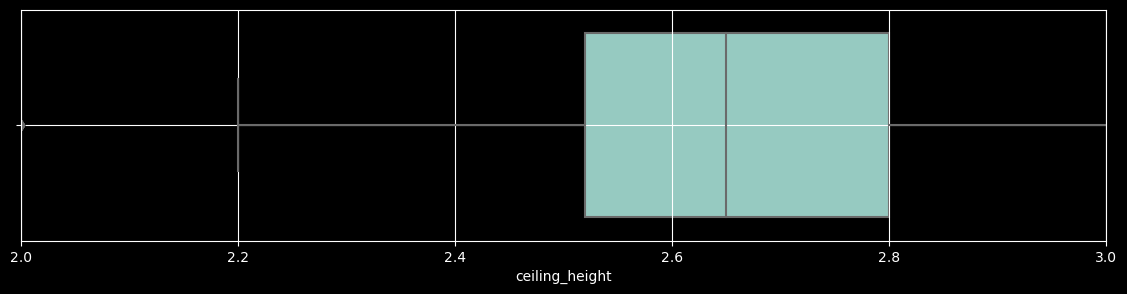

In [35]:
plt.figure(figsize=(14, 3))
sns.boxplot(data=data, x='ceiling_height')
plt.xlim(2,3)
plt.grid()

**Итак**, посмотрим на график.

Большая часть значений ожидаемо находится в диапазоне **до 10 м.**

Есть **аномальные значения**. Они выделяются уже где-то после высоты в 15 м. 

Также сомнительно наличие квартир с **высотой** потолков **ниже первого квартиля** (карлики опять негодуют!).

**Итого:**

- Аномалии по высоте более 10 м вероятно являются простой опечаткой. Например реальная высота равна 3.2 м, а написали 32 м. Исправим далее.
- Аномалии по высоте за границой первого квартиля вряд ли реальны, так как существуют нормативные акты относительно минимальной высоты потолков. Поэтому округлим до значения первого квартиля - это вполне разумно.
- Максимальное значение `100` явно выходит за все возможные рамки, проверим на всякий случай, что же этой за дворец такой.


Изменим значения в диапазоне от 10 м до примерно 40 м. 

По сути, нам требуется просто разделить их на 10 и заменить соответствующие значения в столбце. 

Те, что меньше 25 м, приравняем к значению третьего квартиля, так как результат будет менеее 2.5 м, что нас не устраивает.

Те, что больше, уменьшим в десять раз.

In [36]:
ceil_round_range = range(25, 40)
ceil_quarter3_round_range = range(10, 25)

(data.loc[
    (data['ceiling_height'] >= 10) & 
    (data['ceiling_height'] <= 25), 
    'ceiling_height'
    ] 
) = (                              # Заменяем те, что в диапазоне от 10 м до 25 м значением третьего квартиля
    ceiling_height_description.loc['75%']
)


(data.loc[
    (data['ceiling_height'] > 25) & 
    (data['ceiling_height'] <= 40), 
    'ceiling_height'
    ]
) = (                               # Заменяем те, что в диапазоне от 25 м до 40 м значением в 10 раз меньшим предыдущего
(data.loc[
    (data['ceiling_height'] > 25) & 
    (data['ceiling_height'] <= 40), 
    'ceiling_height']) / 10
)


(data.loc[
    (data['ceiling_height'] < ceiling_height_description.loc['25%']),
     'ceiling_height'
    ]
) = (                               # Заменяем те, что меньше первого квартиля значением первого квартиля
    ceiling_height_description.loc['25%']
)

Все, что больше сорока считаем аномально боьшими значениями, поэтому строки с такими зачениями стоит удалить.

На всякий случай посмотрим что же это за объявления такие.

In [37]:
data.query('ceiling_height > 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,False,False,11.0,5,санкт-петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,санкт-петербург


В принципе ожидаемо: здесь явно было что-то не так. Но теперь мы смело можем удалить эту строку.

In [38]:
data.drop(index=22869, inplace=True)
data.reset_index(drop=True, inplace=True)

Распределение поправили.

Посмотрим на текущую диаграмму размаха значений.


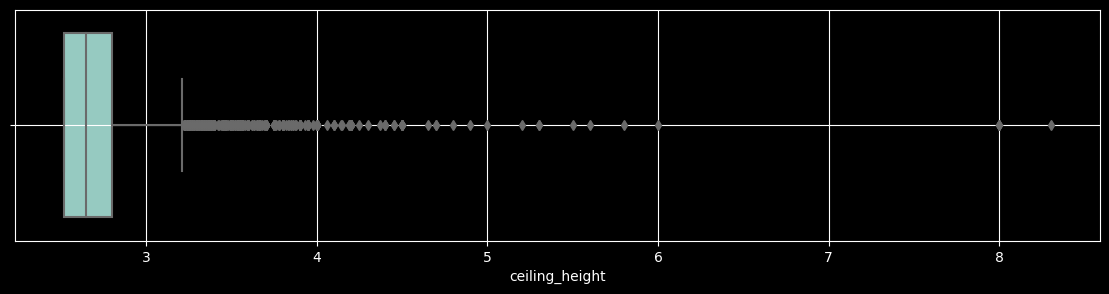

In [39]:
plt.figure(figsize=(14, 3))
sns.boxplot(data=data, x='ceiling_height')
plt.grid()

Теперь распределение значений выглядит реалистично.

Перейдем к заполнению пропусков.

___

#### Работа с пропущенными значениями (продолжение)

##### Заполнение пропусков в столбце `ceiling_height`

In [40]:
print('{:.2%}'.format(data.ceiling_height.isna().sum() / len(data.ceiling_height)))

38.81%


Пропусков в этом столбце достаточно много - `38 %` относительно всех строк, поэтому оставить это без внимания будет неправильно.

Воспользуемся методом заполнения пропусков на основе медианного значения среди объявлений в одинаковых районах.

In [41]:
ceiling_height_by_location = data.groupby('new_locality_name').agg({'ceiling_height' : ['median', 'mean', 'count']})
ceiling_height_by_location

ceiling_height                
                          median      mean count
new_locality_name                               
бокситогорск                3.90  3.900000     2
волосово                    2.52  2.542105    19
волхов                      2.58  2.663966    58
всеволожск                  2.70  2.679816   272
выборг                      2.55  2.747347    98
...                          ...       ...   ...
сосновый бор                2.52  2.592353    51
сясьстрой                   2.56  2.605000    10
тихвин                      2.60  2.614545    11
тосно                       2.52  2.563714    70
шлиссельбург                2.52  2.600244    41

[292 rows x 3 columns]

Из этого датафрейма будем получать медианные значения по соответствующему региону методом `loc[]`:

In [42]:
# Проверим, как получить значение медианы по названию населенного пункта 
ceiling_height_by_location.loc['бокситогорск', 'ceiling_height']['median']  

3.9

На всякий случай посмотрим не закрались ли сюда вдруг какие-то неведомые значения

In [43]:
ceiling_height_by_location.describe()

ceiling_height                          
              median        mean         count
count     236.000000  236.000000    292.000000
mean        2.598432    2.625856     49.650685
std         0.133678    0.138836    591.372021
min         2.520000    2.520000      0.000000
25%         2.520000    2.550000      1.000000
50%         2.550000    2.599516      3.000000
75%         2.610000    2.650667      8.000000
max         3.900000    3.900000  10099.000000

In [44]:
ceiling_height_by_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, бокситогорск to шлиссельбург
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (ceiling_height, median)  236 non-null    float64
 1   (ceiling_height, mean)    236 non-null    float64
 2   (ceiling_height, count)   292 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 17.2+ KB


Среди некоторых населенных пунктов медиану посчитать просто невозможно, так как ни в одном объявлении не указана высота потолков. Значит заполним эти пропуски медианой по всем данным, посчитанной ранее - `2.65 м`

In [45]:
for location in ceiling_height_by_location.index:
    location_median_ceiling_height = ceiling_height_by_location.loc[location, 'ceiling_height']['median']
    if not np.isnan(location_median_ceiling_height):
        (data.loc[
            (data['new_locality_name'] == location) & 
            (data['ceiling_height'].isna()), 
            'ceiling_height'
            ]
        ) = location_median_ceiling_height

    elif np.isnan(location_median_ceiling_height):
        (data.loc[
            (data['new_locality_name'] == location) & 
            (data['ceiling_height'].isna()), 
            'ceiling_height'
            ]
        ) = ceiling_height_description.loc['50%']

data.ceiling_height.isna().sum()

0

**Итак**, пропуски в столбце `ceiling_height` обработаны и заполнены медианными значениями среди объявлений в том же районе.

В заключение, взглянем в очередной раз на диаграмму размаха значений.

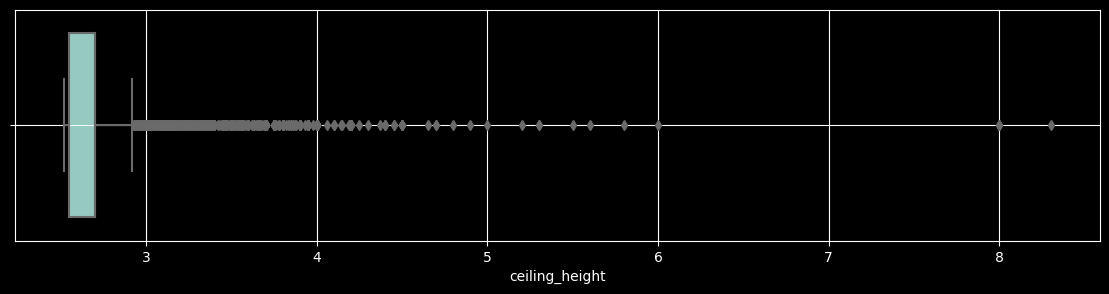

In [46]:
plt.figure(figsize=(14, 3))
sns.boxplot(data=data, x='ceiling_height')
plt.grid()

Медиана немного сместилась в меньшую сторону, но теперь значения в этом столбце выглядят реалистично и их можно использовать для дальнейшего анализа.

**Посмотрим на столбцы, в которых остались пропуски**

In [47]:
pprint(
    [(column,  data[column].isna().sum()) for column in data.columns if data[column].isna().sum()]
)

[('floors_total', 86),
 ('living_area', 1903),
 ('kitchen_area', 2278),
 ('airports_nearest', 5542),
 ('city_centers_nearest', 5519),
 ('parks_around3000', 5518),
 ('parks_nearest', 15616),
 ('ponds_around3000', 5518),
 ('ponds_nearest', 14588),
 ('days_exposition', 3180)]


##### Заполним пропуски в столбце `floors_total`, а также изменим тип данных в нем

Поскольку точной иформации нет, то учитывая, что пропусков в этом столбце не так много (а именно - `86`) - заполним их значением этажа квартиры.
 
Это не слишком сильно повлияет на дальнейшие результаты исследования, зато пропущенных значений будет меньше)👍🏻

In [48]:
(data.loc[
      data.floors_total.isna(),
      'floors_total'
    ]
) = (data.loc[
      data.floors_total.isna(),
      'floor'
    ]
)

data.floors_total.isna().sum()

0

In [49]:
data['floors_total'] = data['floors_total'].astype(int)
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

#### Заполним пропуски в столбцах `living_area`, `kitchen_area`

Жилая площадь - площадь комнат, пригодных для проживания (спальни, гостинные, детские и т.п.).

Она регламентируется исходя из минимальной площади на одного человека.

Пропуски заполним долей жилой площади от общей, которую посчитаем путем вычисления среднего процента жилой площади в квартирах Санкт-Петербурга.

Для более точных результатов исключим из выборки квартиры со слишком большой и слишком маленькой общей площадью.

In [50]:
living_area_sampling = data.query('total_area > 18 & total_area < 100')

living_area_sampling['living_area_percentange'] = living_area_sampling['living_area'] / living_area_sampling['total_area']

living_area_sampling_saint_petersburg = np.nanmean(living_area_sampling.query('new_locality_name == "санкт-петербург"')['living_area_percentange'])

print('{:.2%}'.format(living_area_sampling_saint_petersburg))

56.33%


**Итак**, по Санкт-Петербургу средний процент жилой площади от общей площади квартиры среди квартир с площадью от минимальной (18 м<sup>2</sup>) до квартир с площадью менее 100 м<sup>2</sup> составил `56.33%`. Такой результат соотносится с реальным (около `60%` в среднем), поэтому эти данные можно использовать для заполнения пропусков.

К слову о минимальной площади. Согласно Жилищному кодексу РФ, минимальная социальная норма жилого помещения составляет **18м<sup>2</sup>**. В свою очередь минимальная социальная норма жилого помещения - это размер общей площади жилья, приходящейся на одного нанимателя (собственника).

Поэтому целесообразно удалить объявления, в которых площадь меньше мимнимально установленного значения (именно поэтому мы не включили такие объявления в срез `living_area_sampling`)

Посмотрим сколько всего таких объявлений.

In [51]:
len(data.query('total_area < 18'))

15

`15` объявлений. 

Их удаление общую картину особо не поменяет, но в любом случае стоит сообщить, что на сервисе имеется возможность опубликовать объявление о продаже недвижимости, общая площадь которой меньше минимально установленного значения.

In [52]:
data.drop(data[data['total_area'] < 18].index, inplace=True)
len(data.query('total_area < 18'))

0

#### Устранение аномальных значений (продолжение)

##### Стоит также оценить распределение площадей по аналогии со столбцом `ceiling_height` и удалить аномальные значения, если они есть.

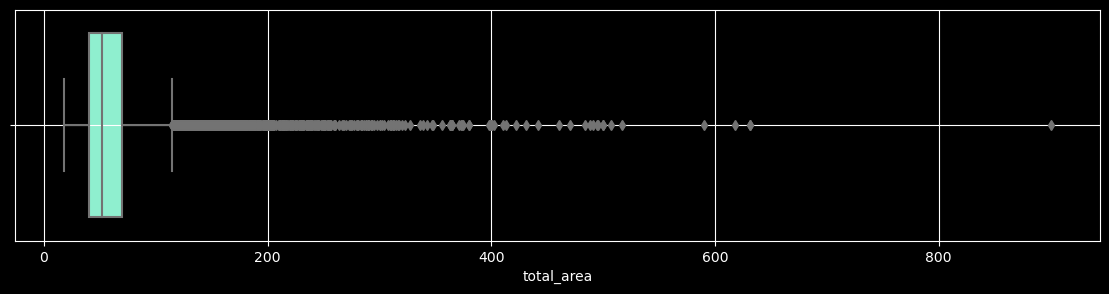

In [53]:
plt.figure(figsize=(14, 3))
sns.boxplot(data=data, x='total_area', color='#7FFFD4')
plt.grid()

Слишком большие значения есть. Их не так много, но все равно негативно влияют на общее распределение.

Вызовем метод `describe()`, оценим значение квартилей.

In [54]:
total_area_description = data.total_area.describe()

total_area_description

count    23677.000000
mean        60.379985
std         35.650659
min         18.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Да... Большие значения общей площади и правда слишком выделяются на фоне большинства квартир.

Согласно статистической сводке, `75%` объектов недвижимости укладываются в примерно 70 м<sup>2</sup>.

Исходя из данных диаграммы размаха выше, большая часть квартир укладывается в общую площадь, равную приблизительно 300 м<sup>2</sup>. 

Посмотрим в скольких объявлениях площадь больше 300 м<sup>2</sup>

In [55]:
len(data.query('total_area > 300'))

61

Всего `61` объявление "для богатых". 

Разумно будет удалить такие огромные квартиры из наших данных и не учитывать их, поскольку они попросту портят распределение значений. К тому же данные сильно не пострадают, да и аномалии тоже будут удалены.

Так и поступим.

In [56]:
data.drop(data[data['total_area'] > 300].index, inplace=True)

И снова взглянем на распределение значений...

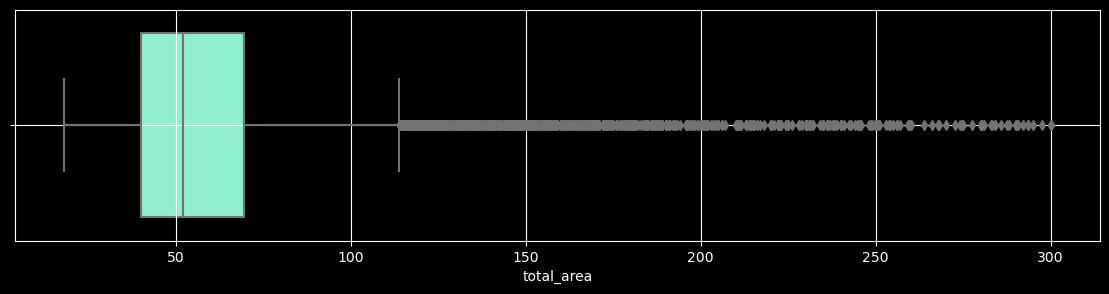

In [57]:
plt.figure(figsize=(14, 3))
sns.boxplot(data=data, x='total_area', color='#7FFFD4')
plt.grid()

Так смотрится куда лучше!

Все значения выстроились почти в одну линию, медиана практически не изменилась и данные чувствуют себя отлично!

Поскольку в этом столбце пропусков нет, то вернемся к исправлению пропусков в столбце `living_area`

Стоит напомнить, что было принято решение заполнить пропуски в `living_area` долевым значанием площади квартиры от общей.

Рассчитали это значение ранее, оно составило около `56%`

In [58]:
target_strokes = data.loc[data['living_area'].isna(), 'living_area'].index

print('Было до:')
print(data.loc[data['living_area'].isna(), ['total_area', 'living_area']].head(10))

(
    data.loc[
        (data['living_area'].isna()),
        'living_area'
        ]
) = np.round((
    data.loc[
        (data['living_area'].isna()),
        'total_area'
        ]
) * living_area_sampling_saint_petersburg, 2)

print('Стало после:')
print(data.loc[target_strokes, ['total_area', 'living_area']].head(10))

Было до:
     total_area  living_area
3         159.0          NaN
7          71.6          NaN
30         32.8          NaN
37         45.8          NaN
44         40.0          NaN
59         46.5          NaN
60         35.0          NaN
81         68.0          NaN
82         80.5          NaN
116        97.2          NaN
Стало после:
     total_area  living_area
3         159.0        89.57
7          71.6        40.33
30         32.8        18.48
37         45.8        25.80
44         40.0        22.53
59         46.5        26.20
60         35.0        19.72
81         68.0        38.31
82         80.5        45.35
116        97.2        54.76


In [59]:
data.living_area.isna().sum()

0

На всякий случай убедимся, что нету объявлений, в которых общая площадь больше жилой, а то мало ли.

In [60]:
len(data[data['living_area'] > data['total_area']])

0

Посмотрим, есть ли объявления, в которых жилая площадь менее учетной нормы по Санкт-Петербургу, а именно 9 м<sup>2</sup>

In [61]:
living_area_less9m = data[data['living_area'] < 9].sort_values(by='total_area').loc[:, ['total_area', 'rooms', 'living_area', 'studio']]

print(f'Кол-во объявлений, в которых жилая площадь меньше учетной нормы - {len(living_area_less9m)}')
living_area_less9m

Кол-во объявлений, в которых жилая площадь меньше учетной нормы - 14


,total_area,rooms,living_area,studio
114,21.4,1,8.3,False
17576,22.0,0,5.0,True
21752,23.0,0,2.0,True
16427,31.0,1,6.0,False
17242,33.0,1,8.9,False
19245,33.0,1,6.5,False
21499,35.3,1,8.5,False
23201,37.0,1,8.0,False
3240,41.0,1,3.0,False
20988,50.6,2,8.0,False


Всего их `14`. Судя по всему, такие значения жилой площади возникли по причине опечатки владельцев.

Логично будет не "портить" хорошие объявления с большой площадью (последние 5 объявлений) и поправить в них значения жилой площади на основе способа, который применили ранее.

В оставшихся округлим значение жилой площади до учетной нормы по Санкт-Петербургу.

In [62]:
target_strokes_area_percent = living_area_less9m.tail().index

print('Было до:')
print(data.loc[target_strokes_area_percent, ['total_area', 'living_area']])


(
    data.loc[
        (target_strokes_area_percent),
        'living_area'
        ]
) = np.round((
    data.loc[
        (target_strokes_area_percent),
        'total_area'
        ]
) * living_area_sampling_saint_petersburg, 2)

print('Стало после:')
print(data.loc[target_strokes_area_percent, ['total_area', 'living_area']])

Было до:
       total_area  living_area
20988        50.6          8.0
13911        52.0          2.0
2307         62.4          8.4
21937        77.6          5.4
23567       139.0          3.0
Стало после:
       total_area  living_area
20988        50.6        28.50
13911        52.0        29.29
2307         62.4        35.15
21937        77.6        43.71
23567       139.0        78.30


In [63]:
target_strokes_min_norm = (living_area_less9m.index)[:9]

print('Было до:')
print(data.loc[target_strokes_min_norm, ['total_area', 'living_area']])


(
    data.loc[
        (target_strokes_min_norm),
        'living_area'
        ]
) = 9.0

print('Стало после:')
print(data.loc[target_strokes_min_norm, ['total_area', 'living_area']])

Было до:
       total_area  living_area
114          21.4          8.3
17576        22.0          5.0
21752        23.0          2.0
16427        31.0          6.0
17242        33.0          8.9
19245        33.0          6.5
21499        35.3          8.5
23201        37.0          8.0
3240         41.0          3.0
Стало после:
       total_area  living_area
114          21.4          9.0
17576        22.0          9.0
21752        23.0          9.0
16427        31.0          9.0
17242        33.0          9.0
19245        33.0          9.0
21499        35.3          9.0
23201        37.0          9.0
3240         41.0          9.0


Ну и распределение в столбце `living_area` после заполнения пропусков посмотрим тоже.

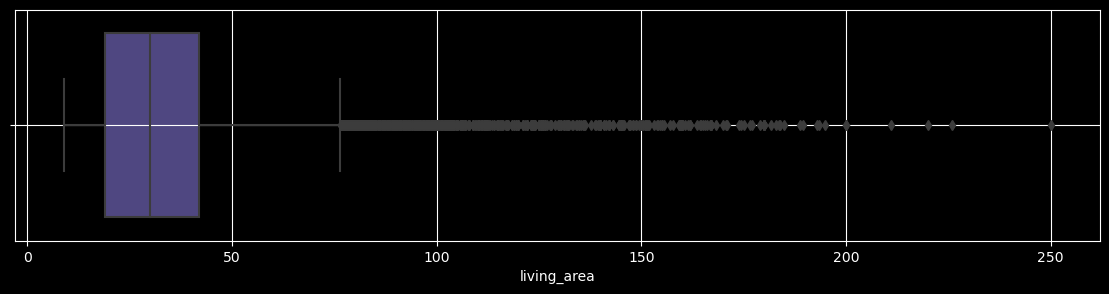

In [64]:
plt.figure(figsize=(14, 3))
sns.boxplot(data=data, x='living_area', color='#483D8B')
plt.grid()

**Порядок!**

Пропуски в столбце `living_area` обработаны перейдем к столбцу `kitchen_area`.

В целом пропущенные значения можно заполнить тем же способом: вычислить среднее значение доли площади, занимаемой кухней в квартире, по Санкт-Петербургу и умножить его на значение общей площади.

In [65]:
kitchen_area_sampling = data.query('total_area > 18 & total_area < 100')

kitchen_area_sampling['kitchen_area_percentange'] = kitchen_area_sampling['kitchen_area'] / kitchen_area_sampling['total_area']

kitchen_area_sampling_saint_petersburg = np.nanmean(kitchen_area_sampling.query('new_locality_name == "санкт-петербург"')['kitchen_area_percentange'])

print('{:.2%}'.format(kitchen_area_sampling_saint_petersburg))

19.05%


`19%` - звучит тоже довольно правдоподобно. 

Можно поверить в то, что если общая площадь квартиры составляет 100 м<sup>2</sup>, то кухня занимает 19 м<sup>2</sup> из них.

Идем дальше.

In [66]:
target_strokes = data.loc[data['kitchen_area'].isna(), 'kitchen_area'].index

print('Было до:')
print(data.loc[data['kitchen_area'].isna(), ['total_area', 'kitchen_area', 'living_area']].head(10))

(
    data.loc[
        (data['kitchen_area'].isna()),
        'kitchen_area'
        ]
) = np.round((
    data.loc[
        (data['kitchen_area'].isna()),
        'total_area'
        ]
) * kitchen_area_sampling_saint_petersburg, 2)

print('Стало после:')
print(data.loc[target_strokes, ['total_area', 'kitchen_area', 'living_area']].head(10))

Было до:
     total_area  kitchen_area  living_area
3         159.0           NaN        89.57
30         32.8           NaN        18.48
37         45.8           NaN        25.80
44         40.0           NaN        22.53
59         46.5           NaN        26.20
60         35.0           NaN        19.72
81         68.0           NaN        38.31
82         80.5           NaN        45.35
133        31.0           NaN        17.46
144        27.0           NaN        15.50
Стало после:
     total_area  kitchen_area  living_area
3         159.0         30.29        89.57
30         32.8          6.25        18.48
37         45.8          8.73        25.80
44         40.0          7.62        22.53
59         46.5          8.86        26.20
60         35.0          6.67        19.72
81         68.0         12.96        38.31
82         80.5         15.34        45.35
133        31.0          5.91        17.46
144        27.0          5.14        15.50


По аналогии с предыдущим столбцом следует убедиться в наличии или отсутствии объявлений, где суммарная площадь `living_area + kitchen_area` не превышает общую - `total_area`.

Но, ведь в квартире еще должен быть и санузел с ванной. Возьмем значение 5 м<sup>2</sup> в качестве того, на которое может различаться суммарная площадь `living_area + kitchen_area` от общей.

In [67]:
wrong_area_sampling = data.query('((living_area + kitchen_area) - total_area) > 5')

print(len(wrong_area_sampling))

wrong_area_sampling.head()

49


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
423,14,11500000.0,98.00,2016-05-10,3,2.65,3,88.00,3,False,False,False,18.67,1,санкт-петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0,санкт-петербург
550,8,3100000.0,31.59,2018-03-08,1,2.70,19,30.55,2,False,False,False,9.28,2,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0,мурино
695,1,3364930.0,34.69,2014-11-27,1,2.64,25,23.43,25,False,False,False,23.43,2,санкт-петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0,санкт-петербург
1059,10,5200000.0,50.00,2015-11-06,2,2.70,35,39.00,15,False,False,False,20.50,2,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0,санкт-петербург
1154,11,7000000.0,38.00,2019-04-09,1,3.20,5,33.00,1,False,False,False,12.00,0,санкт-петербург,31501.0,3670.0,1.0,183.0,3.0,689.0,NaN,санкт-петербург


Нехорошо... В `49` объявлениях (возможно из-за особенностей заполнения пропусков) суммарная жилая площадь и площадь кухни превышают общую.

Коль уж в этих квартирах так много места, чтобы "разжиться", то заполним их снова пользуясь методом заполнения средней долей площади от общей, но немного увеличим это значение, чтобы площадь соответствовала той, что указал владелец квартиры в объявлении. Ну, и не забудем про 5 квадратных метров на санузел и ванную.

Общую площадь после внесения изменений в столбцы `living_area` и `kitchen_area` посчитаем как сумму этих самых площадей.
Отличаться она должна не сильно, но ювелирная точность тут и не требуется. К тому же их всего `49`.

In [68]:
target_strokes = wrong_area_sampling.index

print('Было до:')
print(data.loc[target_strokes, ['total_area', 'kitchen_area', 'living_area']].head(10))

# Меняем значение жилой площади в 0.75 раз 
# (позволит приблизить сумму площадей к площади, указанной автором объявления)
(
    data.loc[
        (target_strokes),
        'living_area'
        ]
) = np.round((
    data.loc[
        (target_strokes),
        'total_area'
        ]
) * 0.75, 2)

# Меняем значение площади кухни в 0.15 раз (как и в предудущих случаях)
(
    data.loc[
        (target_strokes),
        'kitchen_area'
        ]
) = np.round((
    data.loc[
        (target_strokes),
        'total_area'
        ]
) * 0.15, 2)

# Суммируем 'total_area' и 'living_area' и изменяем значение в столбце 'total_area'

(
    data.loc[
        (target_strokes),
        'total_area'
        ]
) = np.round((
    data.loc[
        (target_strokes),
        'living_area'
        ]
) + (data.loc[
        (target_strokes),
        'kitchen_area'
        ]) + 5, 2) # Не забываем про 5 кв м на санузел с ванной

print('Стало после:')
print(data.loc[target_strokes, ['total_area', 'kitchen_area', 'living_area']].head(10))

Было до:
      total_area  kitchen_area  living_area
423        98.00         18.67        88.00
550        31.59          9.28        30.55
695        34.69         23.43        23.43
1059       50.00         20.50        39.00
1154       38.00         12.00        33.00
1406       24.60         18.20        18.00
1853       60.20         14.84        55.00
1991       37.40          8.60        36.40
2307       62.40         41.00        35.15
2948       35.00          8.50        33.00
Стало после:
      total_area  kitchen_area  living_area
423        93.20         14.70        73.50
550        33.43          4.74        23.69
695        36.22          5.20        26.02
1059       50.00          7.50        37.50
1154       39.20          5.70        28.50
1406       27.14          3.69        18.45
1853       59.18          9.03        45.15
1991       38.66          5.61        28.05
2307       61.16          9.36        46.80
2948       36.50          5.25        26.25


**В результате** общая площадь таких квартир незначительно уменьшилась, но теперь объявлений, в которых общая площадь меньше суммы жилой, площади кухни и площади санузла(ванной), должно не быть.

Проверим.

In [69]:
len(data.query('((living_area + kitchen_area) - total_area) > 5'))

0

**Отлично!** Глаз не нарадуется как теперь все красиво)

Так, что там осталось?..

In [70]:
missing_columns_remaining()

[('airports_nearest', 5537),
 ('city_centers_nearest', 5516),
 ('parks_around3000', 5515),
 ('parks_nearest', 15584),
 ('ponds_around3000', 5515),
 ('ponds_nearest', 14561),
 ('days_exposition', 3167)]


#### Посмотрим, что по пропускам в столбцах с картографическими данными 

`airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest`

Проверим, есть ли объявления, в которых расстояние до ближайшего аэропорта, парка, водоема или центра населенного пункта указано как `0`.

Очевидно, что такое вряд-ли может быть. В центрах городов обычно не ставят дома. Это, конечно, оочень удобно для бизнесменов, но что-то немного тех, кто живет на той же Красной площади)

In [71]:
data.query('airports_nearest == 0 | city_centers_nearest == 0 | parks_nearest == 0 | ponds_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
21079,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,санкт-петербург


Такое объявление всего одно.

Заменим значение на `-1`, ибо предложить замену картографичекого значения в принципе невозможно. Квартиры в аэропорту - это, безусловно, интересно, но не в текущей ситуации.

In [72]:
data.loc[21085, 'airports_nearest'] = -1

Оставшиеся же пропуски в этих столбцах адекватно обработать не выйдет, так как картографические данные точные.

Поэтому оставим их как есть. 

Также следует сообщить, что следует улучшить систему, которая считает эти значения, так как пропусков все же довольно много.

#### Рассмотрим столбец `days_exposition`

В нем пропуски не плохие. Они лишь отображают то, что в момент выгрузки данных конкретное объявление все еще было актуально.

Единственное, что стоит оценить, то это зависимость количества пропусков(т.е. актуальных объявлений) с течением времени.

Логично, что чем дальше в прошлое, тем кол-во актуальных объявлений должно быть меньше.

Рассмотрим это.

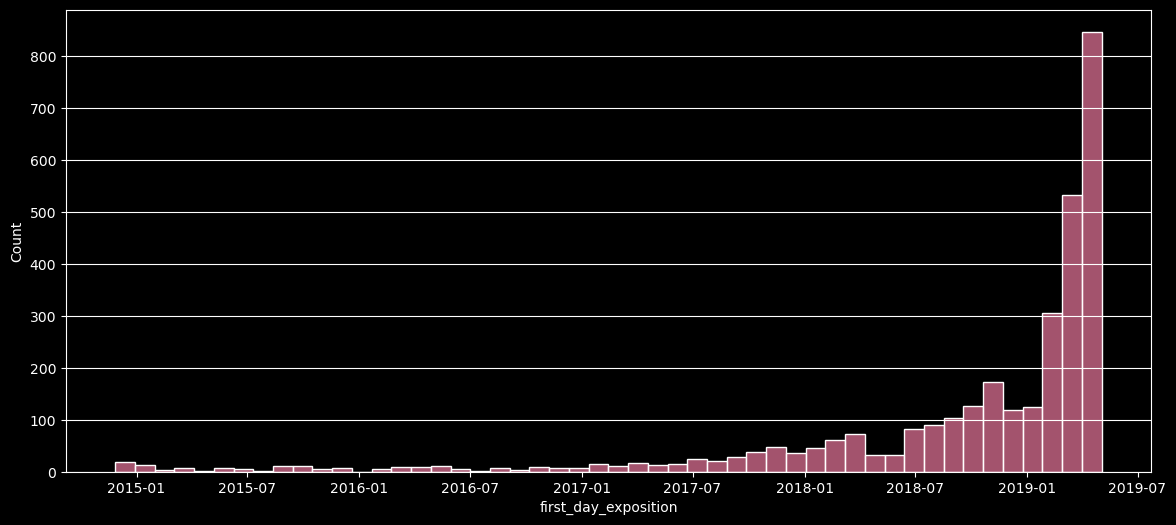

In [73]:
plt.figure(figsize=(14, 6))
plt.grid(axis='y')
sns.histplot(data.query('days_exposition.isna()')['first_day_exposition'], color='#DB7093', bins=50)

plt.show()

Предположение подтвердилось: кол-во актуальных объявлений увеличивается с течением времени. 

Из этого следует, что пропуски заполнять не следует.

#### Устранение аномальных значений (продолжение)

##### Уберем аномалии в столбце `last_price`

Для начала посмотрим на статистики.

In [74]:
data.last_price.describe()

count    2.361600e+04
mean     6.308634e+06
std      7.772958e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Медиана около 4.6 млн, максимум >300 млн., стандартное отклонение - 7.77 млн.

Довольно приличный разброс, который нужно подкорректировать.

Построим диаграмму размаха.

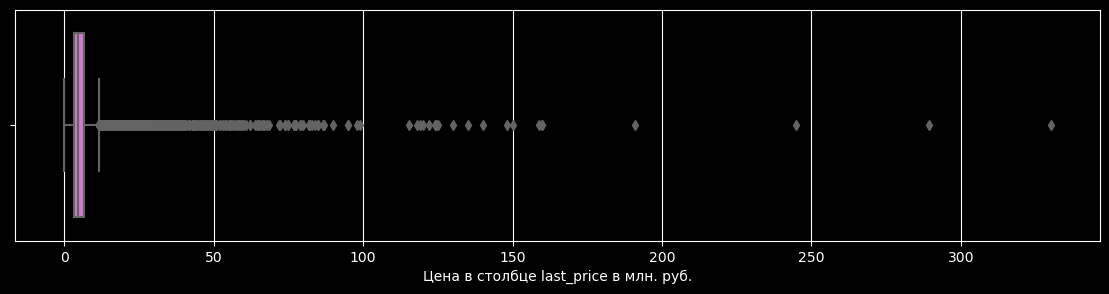

In [75]:
plt.figure(figsize=(14, 3))
plt.grid()
sns.boxplot(x=data.last_price / 1000000, color='#DA70D6').set(xlabel='Цена в столбце last_price в млн. руб.')
plt.show()

Оставим объявления с ценой до 50 млн., так как примерно после этого значения начинается неравномерное распределение цен.

In [76]:
len(data.query('last_price > 50000000'))

99

In [77]:
data.drop(index=data.query('last_price > 50000000').index, inplace=True)
data.reset_index(drop=True, inplace=True)

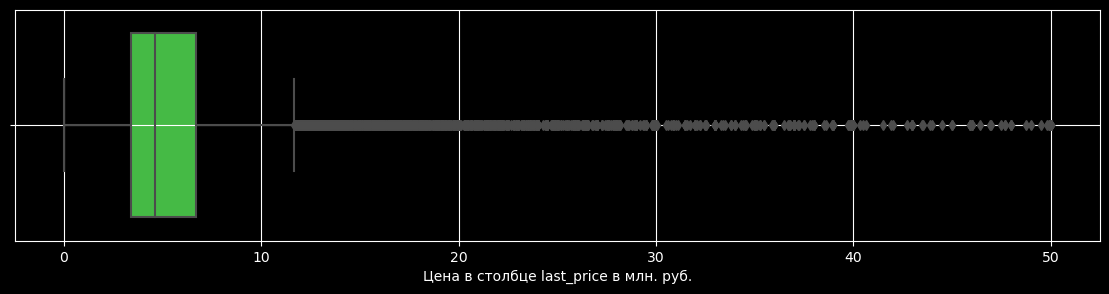

In [78]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=data.last_price / 1000000, color='#32CD32').set(xlabel='Цена в столбце last_price в млн. руб.')
plt.grid()

In [79]:
data.last_price.describe()

count    2.351700e+04
mean     5.968290e+06
std      4.877285e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      5.000000e+07
Name: last_price, dtype: float64

Аномалии устранены

Посмотрим на общую стат сводку по всему датафрейму

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23517 entries, 0 to 23516
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23517 non-null  int64         
 1   last_price            23517 non-null  float64       
 2   total_area            23517 non-null  float64       
 3   first_day_exposition  23517 non-null  datetime64[ns]
 4   rooms                 23517 non-null  int64         
 5   ceiling_height        23517 non-null  float64       
 6   floors_total          23517 non-null  int64         
 7   living_area           23517 non-null  float64       
 8   floor                 23517 non-null  int64         
 9   is_apartment          23517 non-null  bool          
 10  studio                23517 non-null  bool          
 11  open_plan             23517 non-null  bool          
 12  kitchen_area          23517 non-null  float64       
 13  balcony         

In [81]:
data.duplicated().sum()

0

**Краткий вывод**

Исходные данные содержали внушительное количество пропусков, аномальных значений, дубликатов. 

В столбцах, где исправление пропусков, аномалий было возможно, исправили распределения значений, воспользовались различными методами заполнения пропусков, создали и применили собственные фукнции к некоторым столбцам. 

Каждый из этапов предобработки сопроводили визуализациями для обоснования необходимости применения конкретных методов обработки, подтверждения полученных выводов.

В ходе предобработки было оценено качество исходных данных. 

Например, в столбцах с картографическими данными большое кол-во пропусков, которые верно обработать просто невозможно. Описание некоторых столбцов не позволяет быть на 100 % уверенным в том, что конкретный признак характеризует => использование таких данных может привести к получению ложных результатов. 

Стоит уточнить причины появления вышеперечисленных проблем у тех, кто подготавливал данные - это позволит получить более точные данные при их обработке, что напрямую связано с точностью предсказательной модели, которая будет построена в дальнейшем.

Переходим к **добавлению новых столбцов**

### Шаг 3. Рассчёт и добавление новых столбцов ☑️

### Добавим следующие столбцы
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

#### Цена одного квадратного метра

In [82]:
data['1m2_price'] = np.round(data['last_price'] / data['total_area'], 1)

data.loc[range(11), ['last_price', 'total_area', '1m2_price']]

,last_price,total_area,1m2_price
0,13000000.0,108.00,120370.4
1,3350000.0,40.40,82920.8
2,5196000.0,56.00,92785.7
3,10000000.0,100.00,100000.0
4,2890000.0,30.40,95065.8
5,3700000.0,37.30,99195.7
6,7915000.0,71.60,110544.7
7,2900000.0,33.16,87454.8
8,5400000.0,61.00,88524.6
9,5050000.0,39.60,127525.3


#### День недели, месяц и год публикации объявления

Напишем функцию `datetime_conversion`, которая принимает дату из столбца `first_day_exposition` и возвращает кортеж, который содержит число от нуля до шести, описывающее день недели, номер месяца и номер года.

Далее используем данные из него для создания новых столбцов

In [83]:
def datetime_conversion(date: pd.Timestamp) -> tuple:
    return (date.day_of_week, date.month, date.year)


print(data['first_day_exposition'][0], end='\n\n')
print('Результат работы функции:')
datetime_conversion(data['first_day_exposition'][0])

2019-03-07 00:00:00

Результат работы функции:


(3, 3, 2019)

Функция работает корректно. Создадим столбцы `weekday_exposition`, `month_exposition` и `year_exposition`.

Чтобы не перебирать значения в кортеже, а потом использовать `apply()` к исходному столбцу, воспользуемся функцией `apply_and_concat`. 

Да, возможно, это не слишком производительное решение, зато пара функций сделает код в разы чище и понятнее.

Но вернемся к ее описанию.

На вход ей подается исходный датафрейм, столбец из него, по которому мы хотим сделать несколько столбцов (в нашем случае `first_day_exposition`), функция, возвращающая кортеж необходимых значений, и список названий новых колонок.

In [84]:
def apply_and_concat(dataframe: pd.DataFrame, 
                     source_column: str, 
                     func: Callable[[pd.Timestamp], tuple], 
                     column_names: List[str]) -> pd.Series:
    
    return pd.concat((
        dataframe,
        dataframe[source_column].apply(
            lambda cell: pd.Series(func(cell), index=column_names))), axis=1)

data = apply_and_concat(
    data, 
    'first_day_exposition', 
    datetime_conversion, 
    ['weekday_exposition', 'month_exposition', 'year_exposition']
)

# Проверим результат
data.loc[
    range(11), 
    ['first_day_exposition', 
     'weekday_exposition', 
     'month_exposition', 
     'year_exposition']
]

,first_day_exposition,weekday_exposition,month_exposition,year_exposition
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2018-06-19,1,6,2018
4,2018-09-10,0,9,2018
5,2017-11-02,3,11,2017
6,2019-04-18,3,4,2019
7,2018-05-23,2,5,2018
8,2017-02-26,6,2,2017
9,2017-11-16,3,11,2017


#### Тип этажа квартиры

Напишем функцию `floor_categorize`, создадим столбец `floor_type` путем применения методом `apply()` созданной функции к датафрейму

In [85]:
def floor_categorize(advertisement):
    if advertisement['floor'] == 1:
        return 'первый'
    elif advertisement['floors_total'] == advertisement['floor']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_categorize, axis=1)

# Проверим результат
data.loc[
    range(11), 
    [
     'floors_total',
     'floor',
     'floor_type'
    ]
]

,floors_total,floor,floor_type
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,13,другой
4,12,5,другой
5,26,6,другой
6,24,22,другой
7,27,26,другой
8,9,7,другой
9,12,3,другой


#### Расстояние до центра города

In [86]:
data['city_centers_nearest'].fillna(-1, inplace=True) # Необходимо, чтобы поменять тип данных столбца на int64
data['city_centers_nearest_km'] = np.round(data['city_centers_nearest'] / 1000, 0) # Округляем по правилам математики
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype(np.int64)

data[data['city_centers_nearest_km'] == 0]['city_centers_nearest_km'] = -1 # Нули некорректны, заменим их на -1

# Проверим результат
data.loc[
    range(11), 
    [
     'city_centers_nearest',
     'city_centers_nearest_km'
    ]
]

,city_centers_nearest,city_centers_nearest_km
0,16028.0,16
1,18603.0,19
2,13933.0,14
3,8098.0,8
4,-1.0,0
5,19143.0,19
6,11634.0,12
7,-1.0,0
8,15008.0,15
9,13878.0,14


### Шаг 4. Исследовательский анализ данных 🤔

#### Изучим данные в каждом столбце

#### `total_area`

Общая площадь

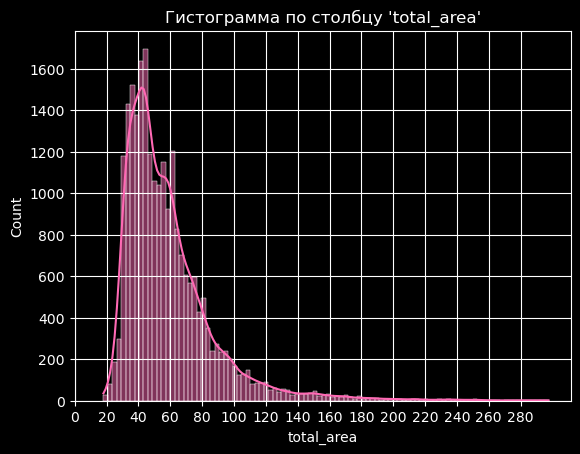

In [87]:
plt.title('Гистограмма по столбцу \'total_area\'')
sns.histplot(data=data, x='total_area', bins=100, color='#FF69B4', kde=True).set(xticks=np.arange(0, 300, 20))
plt.grid()
plt.show()

Как было выяснено до этого, `75%` квартир укладываются в ~69 м<sup>2</sup>.

Убрали объявления с сильно завышенной площадью и оставили все, что до 300 м<sup>2</sup>.

#### `living_area`

Жилая площадь

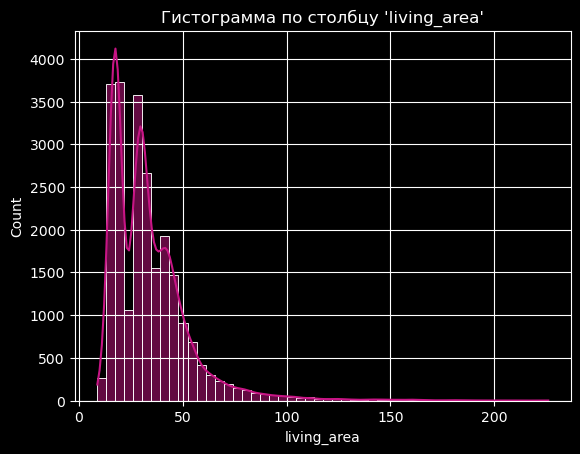

In [88]:
plt.title('Гистограмма по столбцу \'living_area\'')
sns.histplot(data=data, x='living_area', bins=50, color='#C71585', kde=True)
plt.grid()
plt.show()

Видны 2 пика. Вероятно, связанные с результатами по столбцу `total_area`, а также с тем, как заполнялись пропущенные значения. 

Учитывая, что большинство квартир имеют площадь до 70 кв метров, а пропуски в жилой площади мы заполняли значением в 0,56 от общей площади, то распределение выглядит, в целом, нормально.

#### `kitchen_area`

Площадь кухни

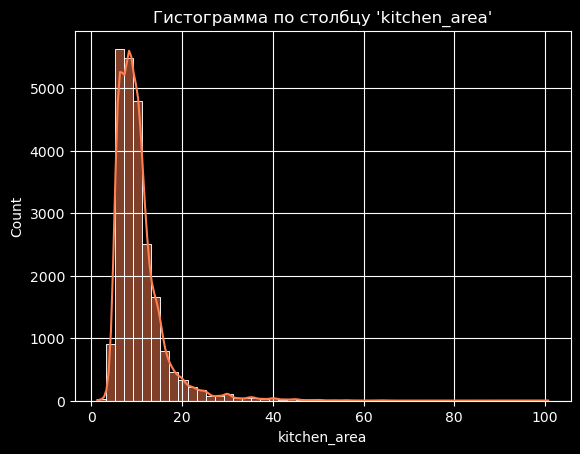

In [89]:
plt.title('Гистограмма по столбцу \'kitchen_area\'')
sns.histplot(data=data, x='kitchen_area', bins=50, color='#FF7F50', kde=True)
plt.grid()
plt.show()

Пики в той же области. Опять же связанные с особенностями заполнения пропусков.

Аномально больших значений нет.

#### `last_price`

Цена объекта

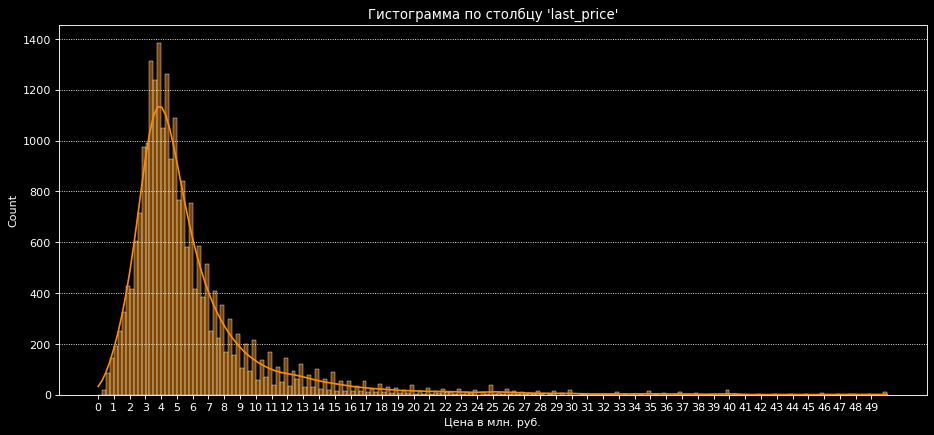

In [90]:

plt.figure(figsize=(14, 6), dpi=80)
plt.title('Гистограмма по столбцу \'last_price\'')
plt.xlabel('Цена в млн. руб.')
sns.histplot(x=data.last_price / 1000000, bins=200, color='#FF8C00', kde=True).set(xticks=np.arange(0, 50, 1))
plt.grid(axis='y', linestyle=':')
plt.show()

Были убраны объявления со слишком высокой ценой, чтобы нормализовать распределение.

Как видно из графика, в большей части объявлений цена не превышает ~7 млн.

#### `rooms`

Кол-во комнат

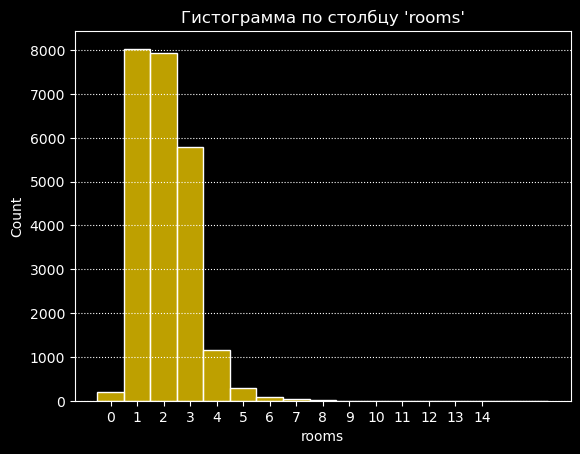

In [91]:
plt.title('Гистограмма по столбцу \'rooms\'')
sns.histplot(data=data, x='rooms', color='#FFD700', discrete=True).set(xticks=np.arange(0, 15, 1))
plt.grid(axis='y', linestyle=':')
plt.show() 

Большая часть всех квартир в объявлениях однокомнатные, либо двухкомнатные.

Результаты на этом графике соотносятся с тем, что большинство квартир имеют площадь в районе 70 м<sup>2</sup>

0 комнат - это студии и квартиры с открытой планировкой.

#### `ceiling_height`

Высота потолков

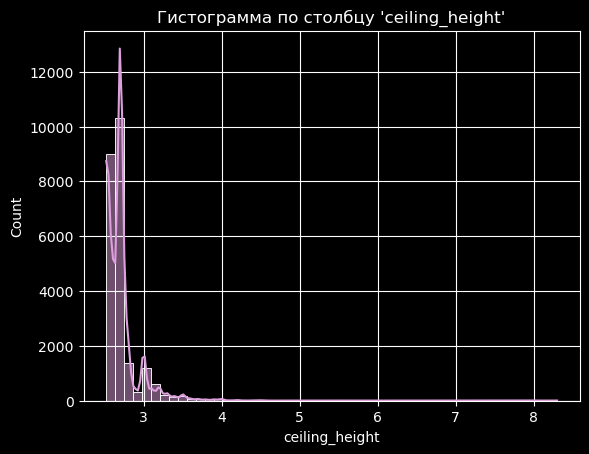

In [92]:
plt.title('Гистограмма по столбцу \'ceiling_height\'')
sns.histplot(data=data, x='ceiling_height', bins=50, color='#DDA0DD', kde=True)
plt.grid()
plt.show()

Пиковые значения около значения ~ 2.5 м<sup>2</sup>

Их можно объяснить тем, что вследствие большого кол-ва пропусков, множество значений были округлены до минимально допустимого значений высоты потолков.

#### `floor`

Этаж квартиры

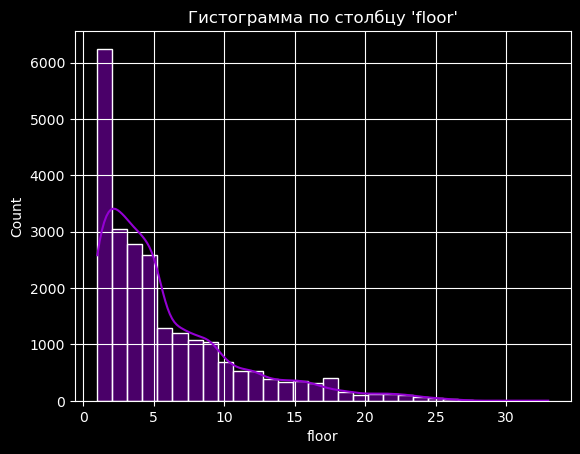

In [93]:
plt.title('Гистограмма по столбцу \'floor\'')
sns.histplot(data=data, x='floor', bins=30, color='#9400D3', kde=True)
plt.grid()
plt.show()

Довольно много квартир на первом этаже. Вероятно связано с тем, что их стоимость ниже, следовательно таких предложений больше.

Далее все распределено по убыванию кол-ва предложений с увеличением этажа, на котором находится квартира.

Это можно объяснить как и тем фактом, что высотных зданий в принципе меньше нежели низких, так и тем, что цена квартиры выше, чем выше она находится, что обуславливает меньшее кол-во таких предложений в принципе.

#### `floor_type`

Тип этажа

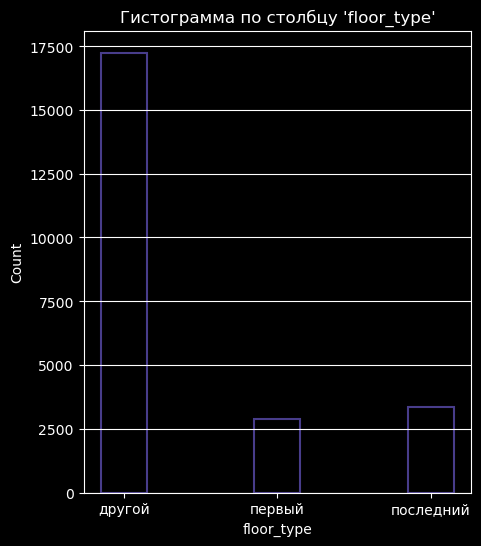

In [94]:
plt.figure(figsize=(5, 6))

plt.title('Гистограмма по столбцу \'floor_type\'')

sns.histplot(data=data, x='floor_type', color='#483D8B', shrink=.3, fill=False)
plt.grid(axis='y')
plt.show()

#### `floors_total`

Общее кол-во этажей в доме

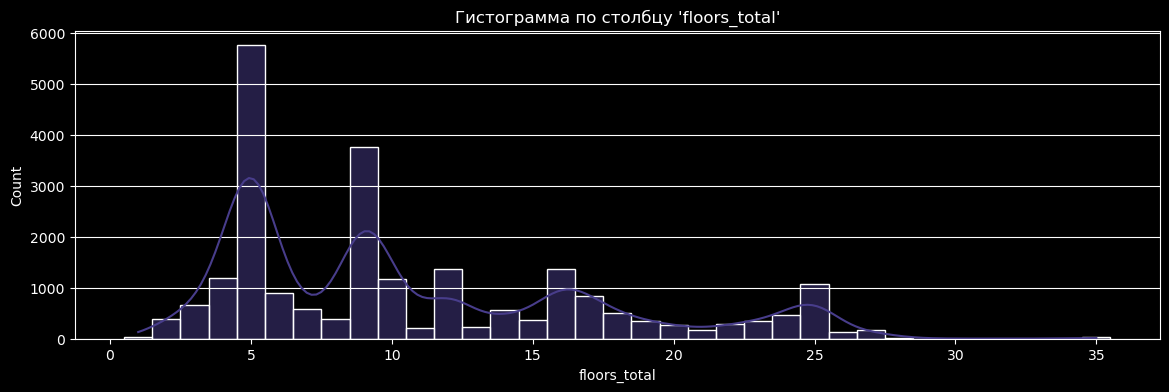

In [95]:
plt.figure(figsize=(14, 4))

plt.title('Гистограмма по столбцу \'floors_total\'')

sns.histplot(data=data, x='floors_total', color='#483D8B', kde=True, discrete=True)
plt.grid(axis='y')
plt.show()

4 выделяющихся пика, которые отображают наиболее часто встречаемое кол-во этажей в домах.

Судя по графику, распространены дома с 5-ю, 9-ю, 16-ю и 25-ю этажами.

5-ти этажек больше всего, что логично: в малых населенных пунктах выше дома строят нечасто.

#### `city_centers_nearest`

Расстояние до центра города в метрах

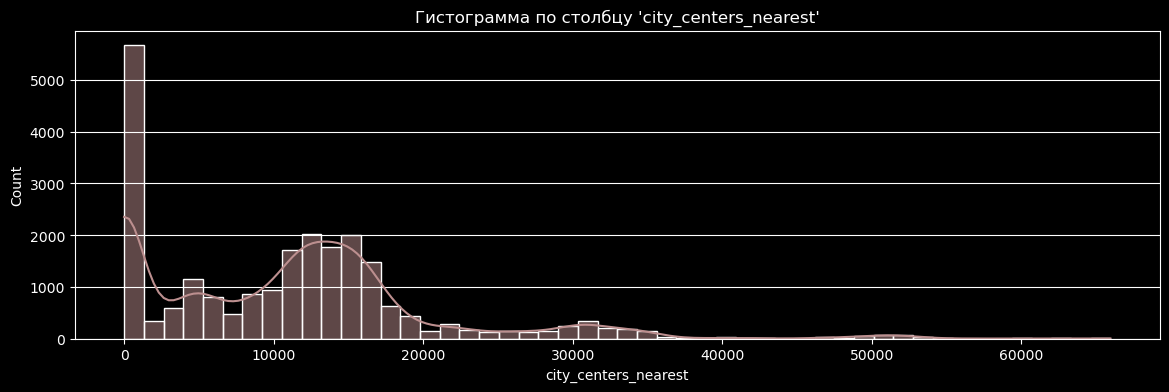

In [96]:
plt.figure(figsize=(14, 4))

plt.title('Гистограмма по столбцу \'city_centers_nearest\'')

sns.histplot(data=data, x='city_centers_nearest', bins=50, color='#BC8F8F', kde=True)
plt.grid(axis='y')
plt.show()

In [97]:
data.city_centers_nearest.value_counts(ascending=False)

-1.0        5515
 8460.0       61
 20802.0      32
 10720.0      29
 8434.0       27
            ... 
 11940.0       1
 11104.0       1
 24311.0       1
 17039.0       1
 6263.0        1
Name: city_centers_nearest, Length: 7582, dtype: int64

На графике пик возле нуля, который связан с тем, что пропуски мы заменили на -1. Он еще раз напоминает о том, что система рассчета картографических данных работает не очень хорошо и стоило бы поправить это.

А так, большинство квартир находятся в пределах 10-20 километрах от центра.

Эти наблюдения используем в дальнейшем для вычисления средней стоимости за километр в Санкт-Петербурге.

#### `airports_nearest`

Ближайший аэропорт

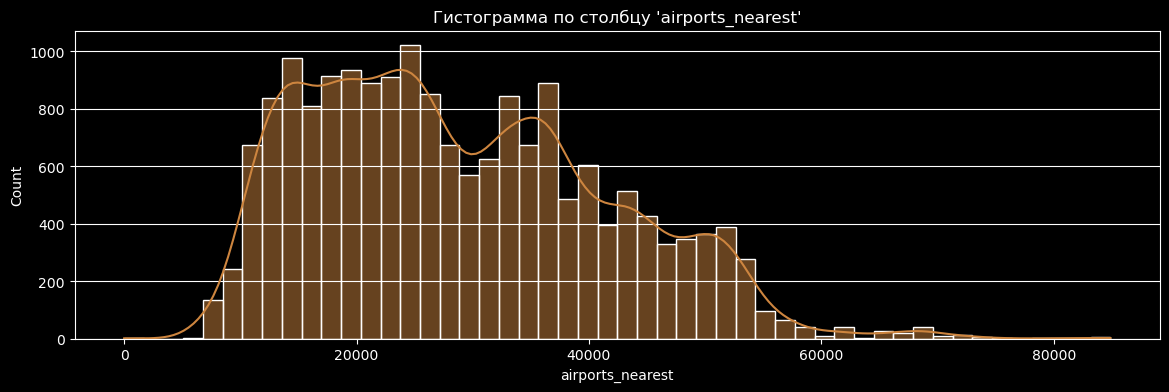

In [98]:
plt.figure(figsize=(14, 4))

plt.title('Гистограмма по столбцу \'airports_nearest\'')

sns.histplot(data=data, x='airports_nearest', bins=50, color='#CD853F', kde=True)
plt.grid(axis='y')
plt.show()

Здесь же ситуация не так однозначна, в сравнении с предыдущим графиком.

Вероятно, что до ~30 км располагаются квартиры непосредственно в самом Санкт-Петербурге, так как ближайший аэропорт - аэропорт Пулково, находящийся в ~17 км от центра города.

Далее следуют квартиры, которые находятся в прилежащих населенных пунктах.

#### `parks_nearest`

Расстояние до ближайшего парка

Объявлений с указанной данной характеристикой не так много (около 30%), так что рассчитывать на полноценно объективную оценку не стоит.

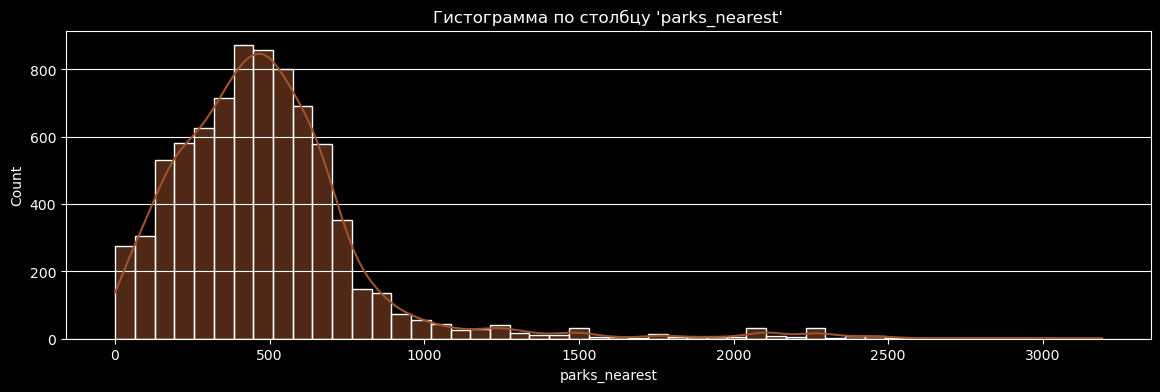

In [99]:
plt.figure(figsize=(14, 4))

plt.title('Гистограмма по столбцу \'parks_nearest\'')

sns.histplot(data=data, x='parks_nearest', bins=50, color='#A0522D', kde=True)
plt.grid(axis='y')
plt.show()

Видно, что чаще всего дома с квартирами раположены в районе полукилометра-километра от парковых зон.

#### `weekday_exposition` и `month_exposition`

День и месяц публикации объявления

Посмотрим сначала на раздельную сводку.

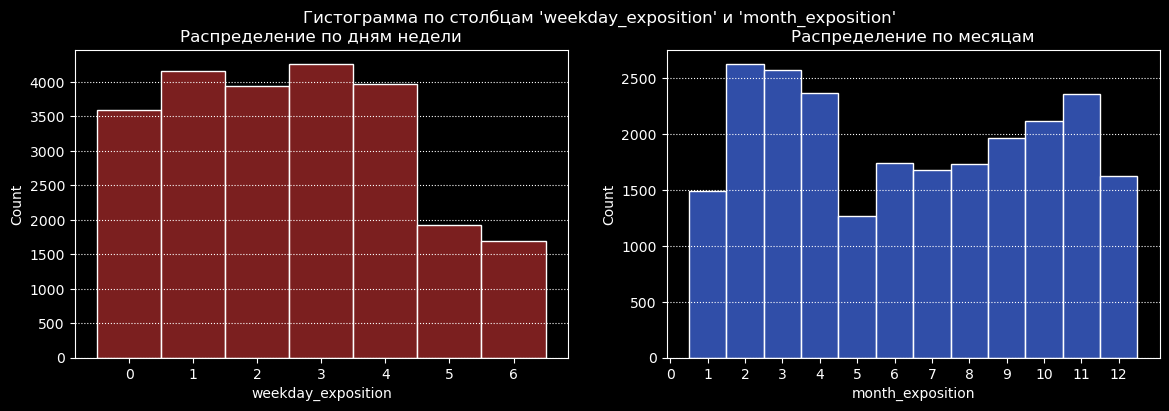

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Гистограмма по столбцам \'weekday_exposition\' и \'month_exposition\'')

# Гистограмма по дням недели
sns.histplot(
         ax=ax[0], 
         data=data, 
         x='weekday_exposition', 
         color='#A52A2A', 
         discrete=True)

ax[0].set_title('Распределение по дням недели')
ax[0].grid(axis='y', linestyle=':')

# Гистограмма по месяцам
(sns.histplot(
         ax=ax[1], 
         data=data, 
         x='month_exposition', 
         bins=12, 
         color='#4169E1', 
         discrete=True)
    .set(
         xticks=np.arange(0, 13, 1))
        )

ax[1].set_title('Распределение по месяцам')
ax[1].grid(axis='y', linestyle=':')

Теперь посмотрим на распределение кол-ва объявлений в каждый день недели в каждом месяце

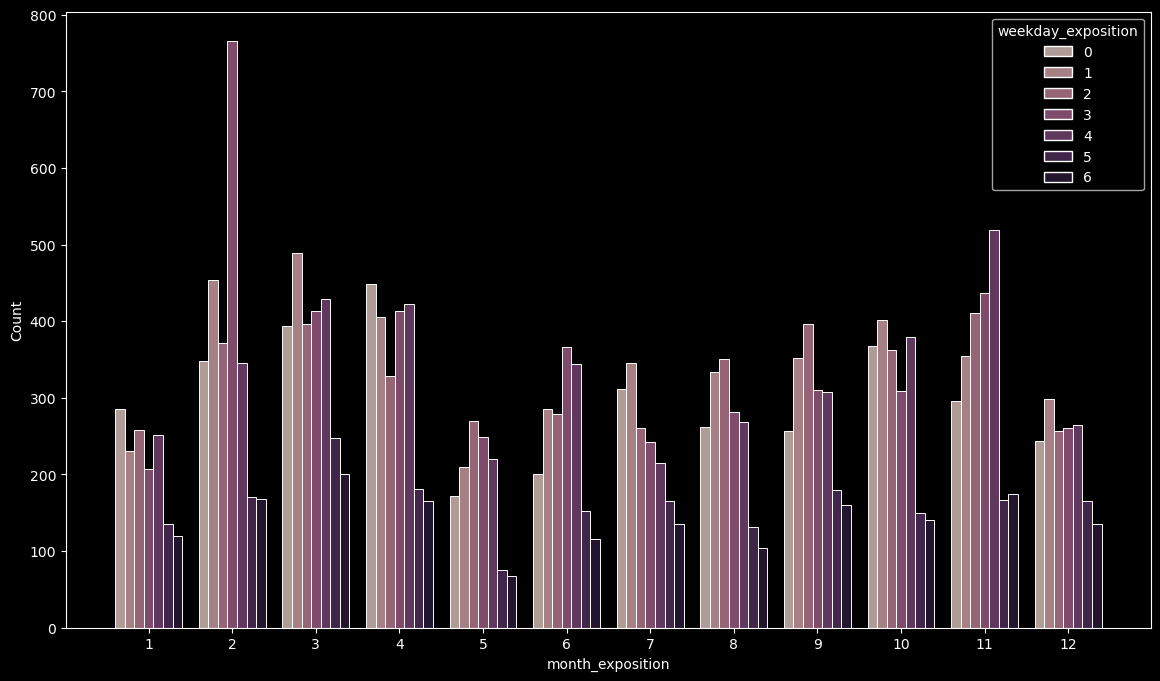

In [101]:
plt.figure(figsize=(14, 8))

(sns.histplot(data=data, 
             x="month_exposition", 
             hue="weekday_exposition", 
             multiple="dodge", 
             shrink=.8, 
             discrete=True)
    .set(xticks=np.arange(1, 13, 1))
)

plt.show()

Итак, что касается распределения объявлений по дням недели их публикации, то с уверенностью можно сказать, что в будние дни публикуют примерно в 2 раза больше объявлений нежели в выходные.

Самые активные месяца по кол-ву публикаций объявлений - февраль, март и апрель. За ними идут три осенних по убыванию - ноябрь, октябрь и сентябрь. Эти наблюдения свидетельствуют о том, что рынок недвижимости подвержен сезонному изменению цен.

**Гистограммы по каждому столбцу были проанализированы**

Перейдем к рассмотрению и исслдованию следующих **вопросов**:
> Как быстро продавались квартиры?

> Какие факторы больше всего влияют на общую (полную) стоимость объекта?

> Какая средняя стоимость за 1 м<sup>2</sup> в топ-10 населенных пунктах?

> Как стоимость объектов зависит от расстояния до центра города?

#### Как быстро продавались квартиры?

Для этого подробнее исследуем столбец `days_exposition`

In [102]:
days_exposition_info = data.days_exposition.describe()
days_exposition_info

count    20371.000000
mean       180.203279
std        219.240441
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Отсюда возьмем значения медианы и среднего и запишем их в соответствующие переменные.

In [103]:
median = days_exposition_info['50%']
meaning = days_exposition_info['mean']

print('{} - медиана\n{} - среднее'.format(median, np.round(meaning, 1)))

95.0 - медиана
180.2 - среднее


Построим гистограмму

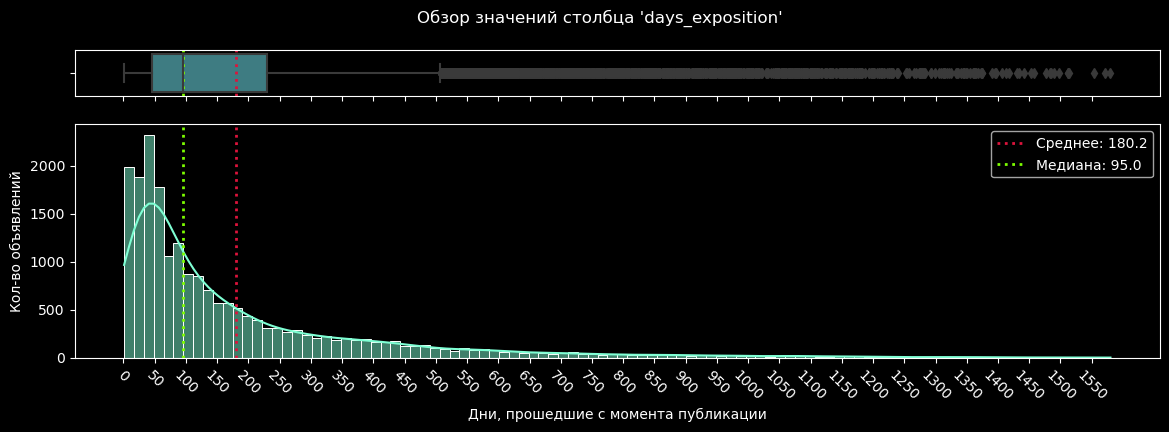

In [104]:
fig, (ax_boxplot, ax_histplot) = plt.subplots(2, figsize=(14, 4), gridspec_kw= {"height_ratios": (0.2, 1)}, sharex=True)
fig.suptitle('Обзор значений столбца \'days_exposition\'')


sns.boxplot(
    data=data,
    x='days_exposition',
    ax=ax_boxplot,
    palette='crest'
)
ax_boxplot.axvline(meaning, color='#DC143C', linestyle=':', linewidth=2)
ax_boxplot.axvline(median, color='#7CFC00', linestyle=':', linewidth=2)

ax_boxplot.set(xlabel='')

sns.histplot(
    data=data,
    x='days_exposition',
    bins=100,
    color='#7FFFD4',
    kde=True,
).set(
    xticks=np.arange(0, 1600, 50)
)
ax_histplot.axvline(meaning, color='#DC143C', linestyle=':', linewidth=2, label=f'Среднее: {np.round(meaning, 1)}')
ax_histplot.axvline(median, color='#7CFC00', linestyle=':', linewidth=2, label=f'Медиана: {median}')

ax_histplot.legend()
plt.xticks(rotation=-45)
ax_histplot.set_ylabel('Кол-во объявлений')
ax_histplot.set_xlabel('Дни, прошедшие с момента публикации')

plt.show()

Как видно из графика, размах значений довольно большой.

Есть несколько пиковых значений, вероятно связанные с правилами размещения на площадке - в этом убедимся далее.

In [105]:
data.days_exposition.value_counts(ascending=False, dropna=False).head(20)

NaN     3146
45.0     877
60.0     538
7.0      232
30.0     208
90.0     200
4.0      175
3.0      157
5.0      149
14.0     145
9.0      141
44.0     138
20.0     138
8.0      137
11.0     134
10.0     127
13.0     127
18.0     127
28.0     126
15.0     125
Name: days_exposition, dtype: int64

Более 3000 объявлений еще не были проданы на момент получения данных.

А далее следует вероятно то, что и ожидалось увидеть: 45 дней, 60 дней, 7 дней, 30 дней и 90 дней.

Такие ровные значения отнюдь не случайность, а фиксированные сроки размещения различного рода объявлений, описанные в правилах площадки. 

К слову, вот они: [Сроки размещения объявлений Яндекс.Недвижимость](https://yandex.ru/support/realty/paid.html#paid__duration)

Для удобства сразу поясним, от чего зависит срок размещения:

> до 4,5 млн -> `45 дней`

> от 4,5 до 10 млн -> `60 дней`

> от 10 млн -> `90 дней`

> длительная аренда -> `7 дней`

> посуточная аренда -> `30 дней`


Также стоит упомянуть, что полученные наблюдения сходятся с результатами предыдущих: гистограмма по столбцу `last_price` явно подтверждает тот факт, что большая часть квартир имеет стоимость около 4.5 млн. Это и отражено на вышепостроенном графике.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Для начала посмотрим на графики корреляции недескретных величин с конечной ценой.

В нашем случае:

- `total_area`  
- `living_area`
- `kitchen_area`

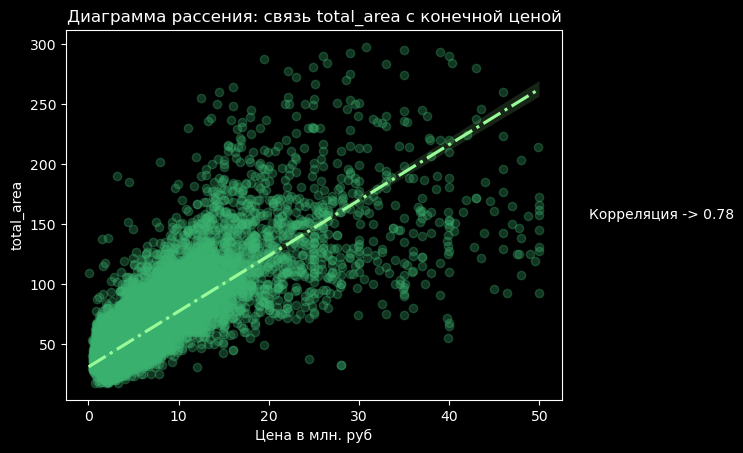

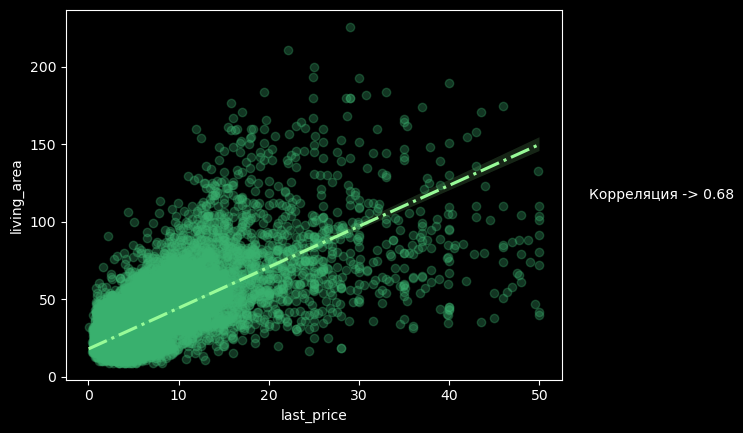

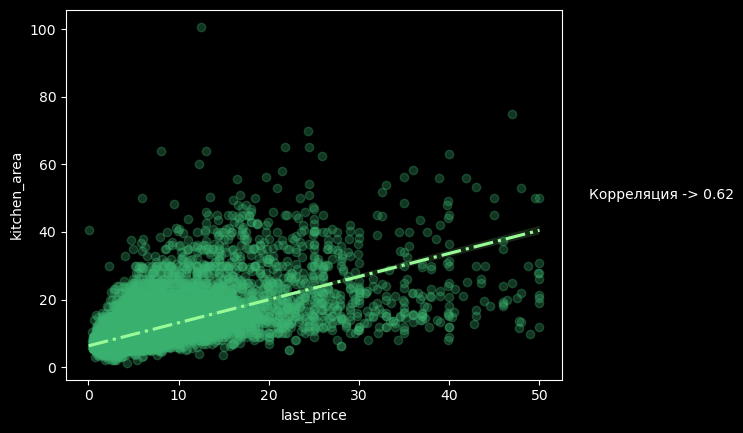

In [106]:
factors = [
    'total_area',  
    'living_area',  
    'kitchen_area'
]

fig, ax = plt.subplots()
for i, factor in enumerate(factors):
    # Рассчет коэффициента Пирсона
    correlation = np.round(data[factor].corr(data['last_price']), 2)

    # Построение графика
    sns.regplot(
        data=data,
        x=(data.last_price / 1000000),
        y=factors[i],
        color="#3CB371",
        scatter_kws={'alpha': 0.3},
        line_kws={'color': '#98FB98', 'linestyle': '-.'}
    )

    ax.set_title(f'Диаграмма рассения: связь {factor} c конечной ценой')
    ax.set_xlabel('Цена в млн. руб')
    ax.set_ylabel(factor)
    
    # Добавим надпись с указанием коэффициента Пирсона
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    ax = plt.gca()
    p = plt.Rectangle((left, bottom), width, height, fill=False)
    p.set_transform(ax.transAxes)
    p.set_clip_on(False)

    ax.text(right+.45, 0.5 * (bottom + top), f'Корреляция -> {correlation}',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)
    
    plt.show()

Как видно из графиков, наиболее сильно с ценой коррелирует общая площадь квартиры. От размера жилого пространства и площади кухни цена зависит в меньшей степени, но также наблюдается положительное значение коэффициента Пирсона.

Теперь рассмотрим связь следующих столбцов с ценой:

- `rooms`
- `weekday_exposition`
- `month_exposition`
- `year_exposition`

Построим корреляционную матрицу для этих столбцов, включая целевой столбец `last_price`

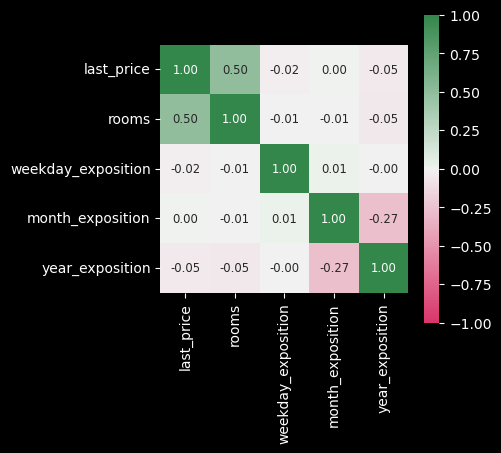

In [107]:
fig, ax = plt.subplots(figsize=(4, 4))
corr_slice = data.loc[:, ['last_price', 
                          'rooms', 
                          'weekday_exposition', 
                          'month_exposition', 
                          'year_exposition']].corr()


sns.heatmap(
    corr_slice,
    ax=ax,
    cmap=sns.diverging_palette(359, 135, s=80, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True,  
    annot=True, fmt=".2f",
    annot_kws={'fontsize': 'small'}
)
plt.show()

Из графика становится понятно, что ощутимо положительная корреляция наблюдается только по столбцу с кол-вом комнат => чем больше комнат, тем больше и цена.

Дата, месяц и год размещения почти никак не влияют на стоимость квартиры. 

Но судя по небольшому отрицательному коэффициенту Пирсона, отражающего связь года размещения объявления и указанной цены в нем, с каждым годом цена на недвижимость незначительно падает.

Теперь посмотрим на то, связана ли цена с тем, какой тип этажа был ей присвоен - столбец `floor_type`

Получим сводную таблицу `floor_type_price`

In [108]:
floor_type_price = pd.pivot_table(
    data=data, 
    index='floor_type', 
    values='last_price', 
    aggfunc=['count', 'median', 'mean']
).reset_index()

floor_type_price.columns = ['floor_type', 'count', 'median', 'mean']

floor_type_price.index = floor_type_price.floor_type
floor_type_price.drop('floor_type', axis=1, inplace=True)
floor_type_price.index.name = None
floor_type_price['mean'] = np.round(floor_type_price['mean'], 1)
floor_type_price

,count,median,mean
другой,17247,4800000.0,6215430.0
первый,2898,3900000.0,4628091.5
последний,3372,4300000.0,5856036.4


Повторно посмотрим на распределение кол-ва объявлений в каждой группе

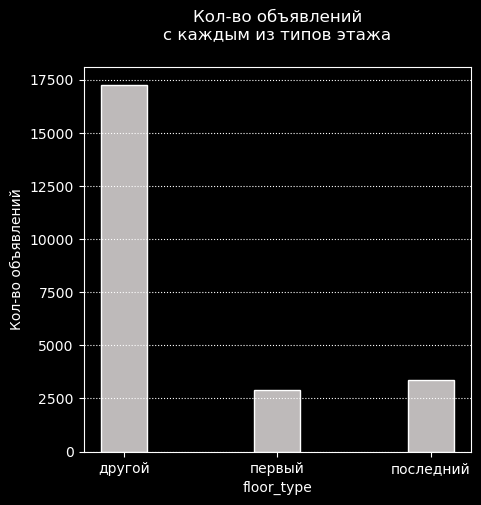

In [109]:
plt.figure(figsize=(5, 5))
sns.histplot(data=data, x='floor_type', color='#FFFAFA', shrink=.3)
plt.ylabel('Кол-во объявлений')
plt.grid(axis='y', linestyle=':')
plt.title('Кол-во объявлений\nс каждым из типов этажа', horizontalalignment='center', y=1.05)
plt.show()

Теперь используя данные из построенной сводной таблицы посмотрим на распределения медианной и средней цены в каждой группе

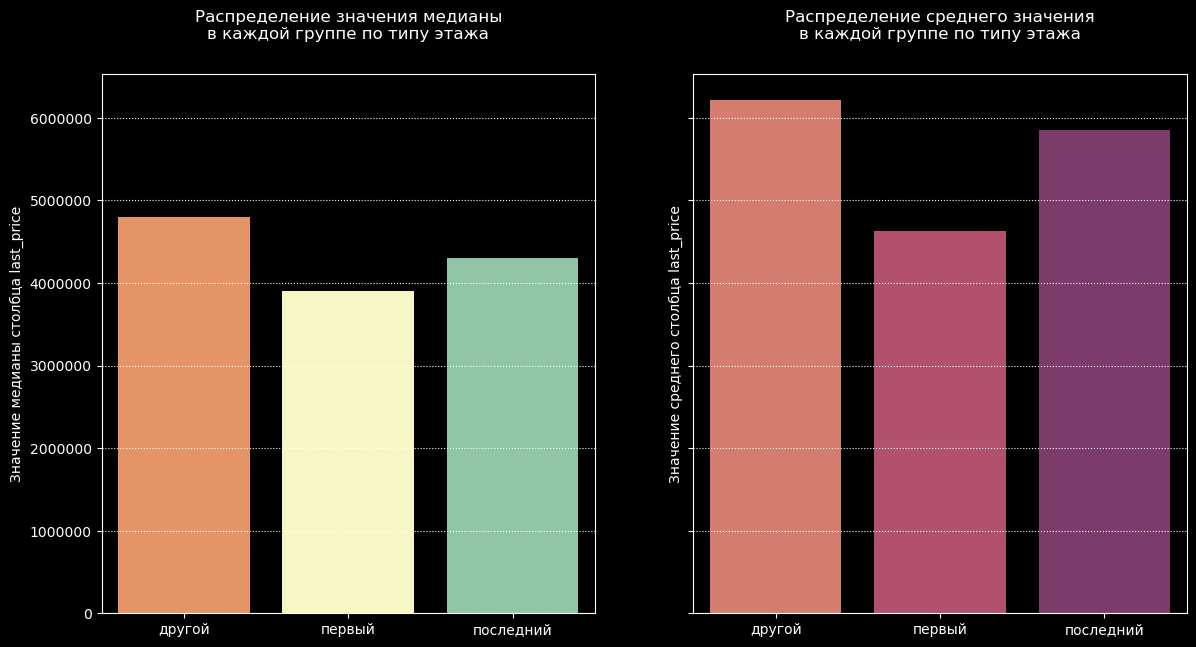

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': (1, 1)}, sharey=True)


sns.barplot(x=floor_type_price.index, y=floor_type_price['median'], palette='Spectral', ax=ax1)
ax1.set_title('Распределение значения медианы\nв каждой группе по типу этажа', 
              horizontalalignment='center', y=1.05)
ax1.set_ylabel('Значение медианы столбца last_price')
ax1.grid(axis='y', linestyle=':')

ax1.set_yticklabels(np.arange(0, 7000000, 1000000))


sns.barplot(x=floor_type_price.index, y=floor_type_price['mean'], palette='flare', ax=ax2)
ax2.set_title('Распределение среднего значения\nв каждой группе по типу этажа', 
              horizontalalignment='center', y=1.05)
ax2.set_ylabel('Значение среднего столбца last_price')
ax2.grid(axis='y', linestyle=':')

plt.show()

Получается, что квартиры на первых этажах самые дешевые, а также объявлений с ними меньше всего.

Самая большая категория - другой. Но главное не это, а то что чаще всего цена больше именно на квартиры на средних этажах. Почти 5 млн медиана, в сравнении с остальными группами: первый - 3.9 млн, последний - 4.3 млн.

Квартиры на последнем этаже лучше нежели на первом, но все равно проигрывают по медианной и средней стоиомсти за квартиру типу "другой". К тому же, сделать точные выводы по этой группе нельзя, так как пропуски в этом столбце были заполнены значением из столбца `floors_total`

Теперь рассмотрим зависимость года публикации объявления, месяца, дня недели от медианной и средней цены по столбцу `last_price`

In [111]:
price_year_dependencies = pd.pivot_table(
    data=data,
    index='year_exposition',
    values='last_price',
    aggfunc=['count', 'median', 'mean']
)

price_year_dependencies.columns = ['count', 'median', 'mean']

price_year_dependencies.index.name = None
print(price_year_dependencies)

price_month_dependencies = pd.pivot_table(
    data=data,
    index='month_exposition',
    values='last_price',
    aggfunc=['count', 'median', 'mean']
)

price_month_dependencies.columns = ['count', 'median', 'mean']

price_month_dependencies.index.name = None
print(price_month_dependencies)

price_weekday_dependencies = pd.pivot_table(
    data=data,
    index='weekday_exposition',
    values='last_price',
    aggfunc=['count', 'median', 'mean']
)

price_weekday_dependencies.columns = ['count', 'median', 'mean']

price_weekday_dependencies.index.name = None
print(price_weekday_dependencies)

      count     median          mean
2014    134  7540000.0  1.079448e+07
2015   1168  5267500.0  7.096184e+06
2016   2761  4500000.0  6.085777e+06
2017   8121  4500000.0  5.873047e+06
2018   8477  4550000.0  5.687073e+06
2019   2856  5000000.0  6.272523e+06
    count     median          mean
1    1487  4600000.0  6.096086e+06
2    2624  4650000.0  6.014875e+06
3    2569  4650000.0  5.865789e+06
4    2364  4794500.0  5.955910e+06
5    1263  4500000.0  5.908732e+06
6    1745  4400000.0  5.828305e+06
7    1675  4600000.0  5.947257e+06
8    1733  4550000.0  5.984462e+06
9    1963  4670000.0  5.993122e+06
10   2113  4550000.0  5.800798e+06
11   2358  4694500.0  6.152402e+06
12   1623  4680000.0  6.078000e+06
   count     median          mean
0   3587  4620000.0  6.016004e+06
1   4161  4700000.0  5.995043e+06
2   3943  4700000.0  6.053287e+06
3   4255  4600000.0  6.150667e+06
4   3970  4550000.0  5.811851e+06
5   1917  4500000.0  5.716171e+06
6   1684  4550000.0  5.796535e+06


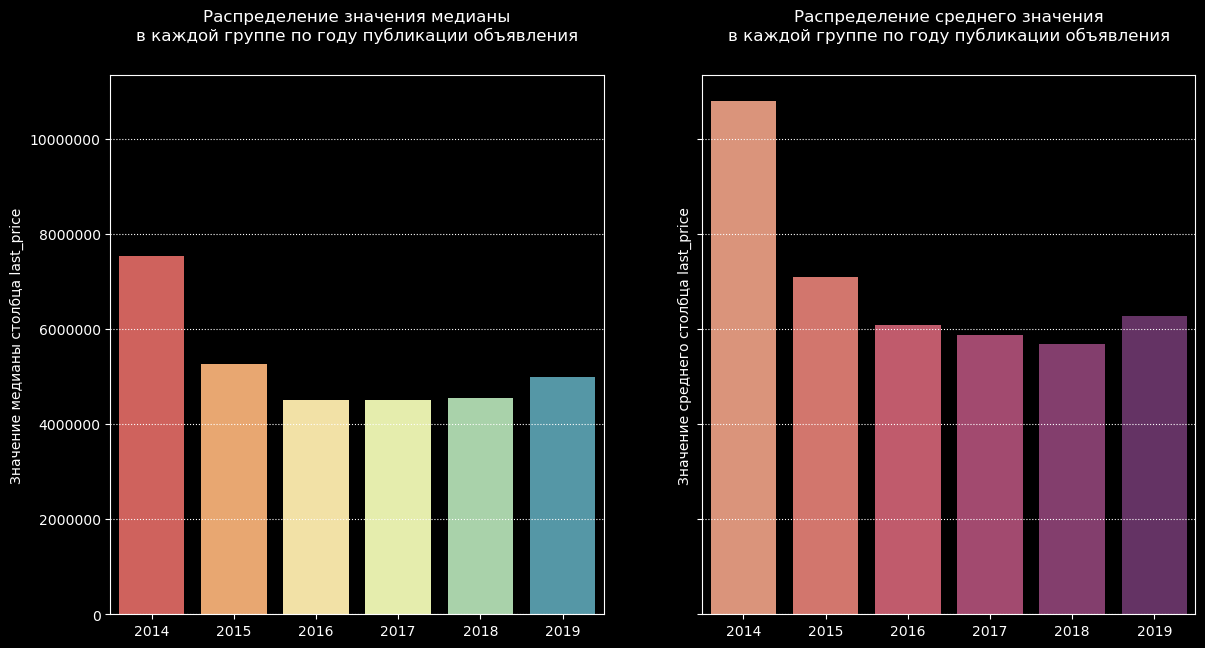

In [112]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), gridspec_kw={'width_ratios': (1,1)}, sharey=True)


sns.barplot(x=price_year_dependencies.index, y=price_year_dependencies['median'], palette='Spectral', ax=ax1)
ax1.set_title('Распределение значения медианы\nв каждой группе по году публикации объявления', 
              horizontalalignment='center', y=1.05)
ax1.set_ylabel('Значение медианы столбца last_price')
ax1.grid(axis='y', linestyle=':')

ax1.set_yticklabels(np.arange(0, 10000001, 2000000))


sns.barplot(x=price_year_dependencies.index, y=price_year_dependencies['mean'], palette='flare', ax=ax2)
ax2.set_title('Распределение среднего значения\nв каждой группе по году публикации объявления', 
              horizontalalignment='center', y=1.05)
ax2.set_ylabel('Значение среднего столбца last_price')
ax2.grid(axis='y', linestyle=':')

plt.show()

В 2014 году на каждом из графиков наблюдается пик. Объявлений в этом году было выложено немного: в 2014 был кризис, вряд ли многие хотели продавать недвижимость.

Далее наблюдается постепенный спад цен до 2019 года. Дальше, судя по всему, цены будут только увеличиваться.

Теперь посмотрим на ситуацию со средней и медианной стоимостью по месяцам

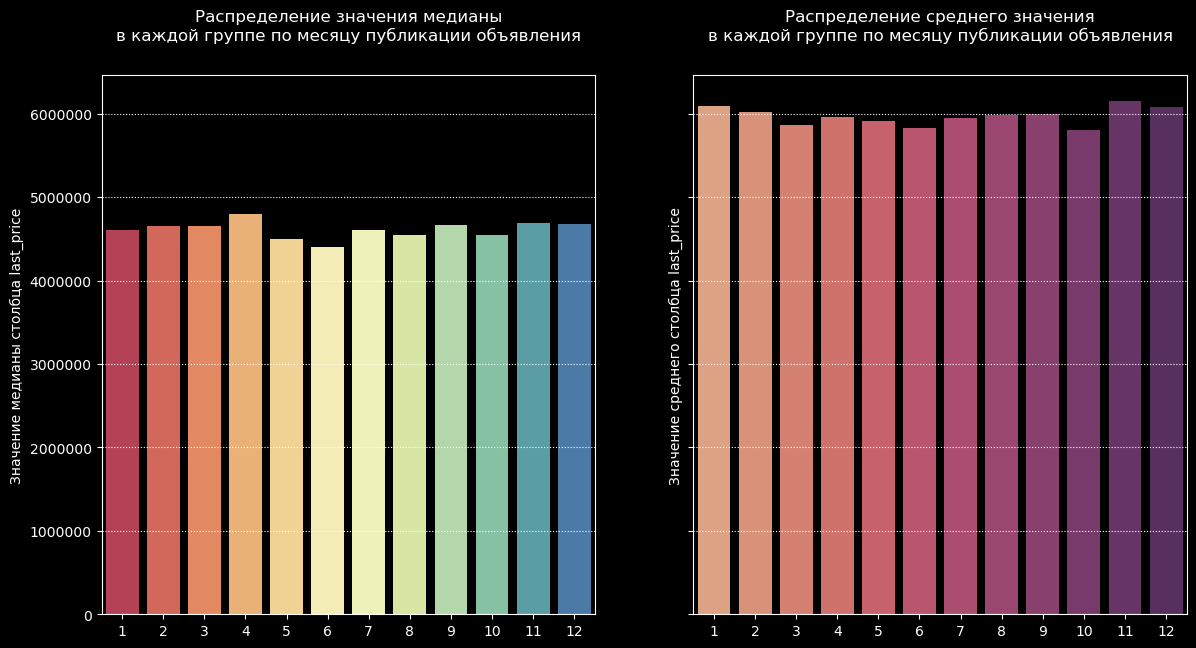

In [113]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), gridspec_kw={'width_ratios': (1,1)}, sharey=True)

sns.barplot(x=price_month_dependencies.index, y=price_month_dependencies['median'], palette='Spectral', ax=ax3)
ax3.set_title('Распределение значения медианы\nв каждой группе по месяцу публикации объявления', 
              horizontalalignment='center', y=1.05)
ax3.set_ylabel('Значение медианы столбца last_price')
ax3.grid(axis='y', linestyle=':')

ax3.set_yticklabels(np.arange(0, 6000001, 1000000))


sns.barplot(x=price_month_dependencies.index, y=price_month_dependencies['mean'], palette='flare', ax=ax4)
ax4.set_title('Распределение среднего значения\nв каждой группе по месяцу публикации объявления', 
              horizontalalignment='center', y=1.05)
ax4.set_ylabel('Значение среднего столбца last_price')
ax4.grid(axis='y', linestyle=':')

plt.show()

На обоих графиках видно небольшую просадку по ценам в летние месяцы.

Но по большому счету зависимости роста или падедения как медианы, так и средней цены от месяца публикации объявления практически нет.

Далее посмотрим на те же графики, но по дню недели

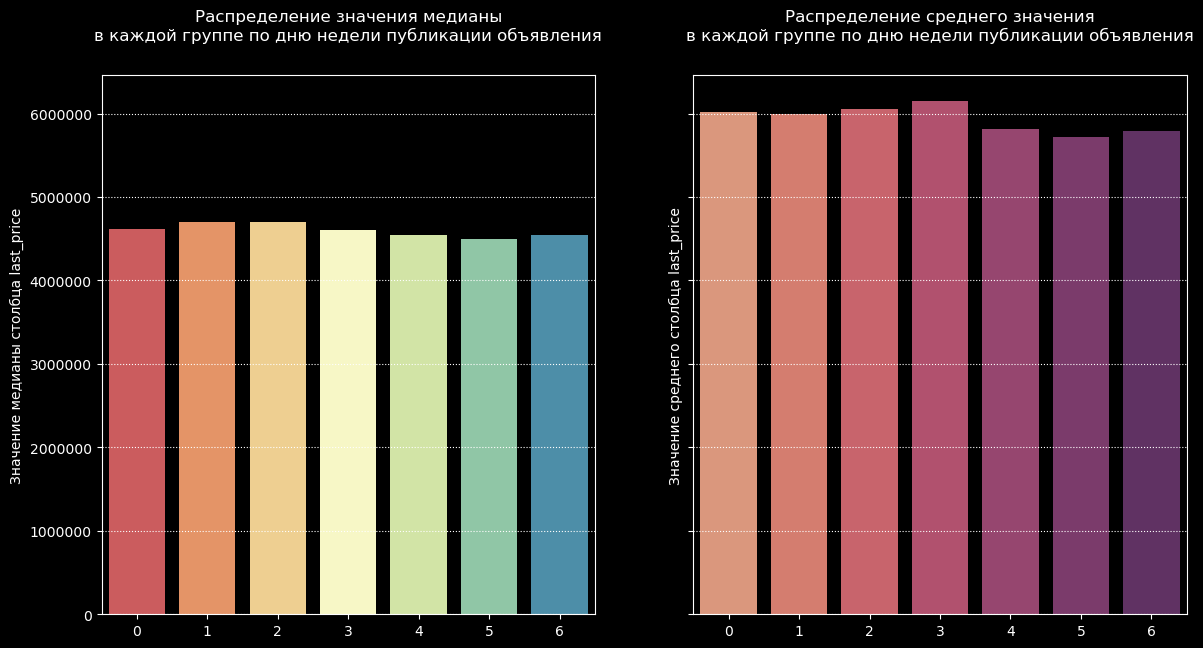

In [114]:
fig, (ax5, ax6) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), gridspec_kw={'width_ratios': (1,1)}, sharey=True)

sns.barplot(x=price_weekday_dependencies.index, y=price_weekday_dependencies['median'], palette='Spectral', ax=ax5)
ax5.set_title('Распределение значения медианы\nв каждой группе по дню недели публикации объявления', 
              horizontalalignment='center', y=1.05)
ax5.set_ylabel('Значение медианы столбца last_price')
ax5.grid(axis='y', linestyle=':')

ax5.set_yticklabels(np.arange(0, 6000001, 1000000))


sns.barplot(x=price_weekday_dependencies.index, y=price_weekday_dependencies['mean'], palette='flare', ax=ax6)
ax6.set_title('Распределение среднего значения\nв каждой группе по дню недели публикации объявления', 
              horizontalalignment='center', y=1.05)
ax6.set_ylabel('Значение среднего столбца last_price')
ax6.grid(axis='y', linestyle=':')

plt.show()

Здесь также наблюдается слабая взаимосвязь параметров (для достоверности можно обратиться к построенной ранее матрице корреляции параметров от цены). Но все же можно сказать, что в выходные меньше покупают, так как цена становится чуть ниже

#### Какая средняя стоимость за 1 м<sup>2</sup> в топ-10 населенных пунктах?

In [115]:
sqm_price_town_names = data.locality_name.value_counts(ascending=False).head(10).index
sqm_top_locality_table = (data
                          .query('locality_name in @sqm_price_town_names')
                          .groupby('locality_name')
                          .agg({'1m2_price' : 'mean'})
)

sqm_price_top = pd.DataFrame(
    {
     'town' : [name for name in sqm_top_locality_table.index], 
     'avg_m2_price' : [np.round(avgm2price, 1) for avgm2price in sqm_top_locality_table.loc[:, '1m2_price']]
    }
)

sqm_price_top = (sqm_price_top
                 .sort_values(by='avg_m2_price', ascending=False)
                 .reset_index(drop=True)
)

sqm_price_top

,town,avg_m2_price
0,санкт-петербург,112220.2
1,пушкин,103130.9
2,деревня кудрово,92473.5
3,поселок парголово,90161.5
4,поселок мурино,85650.3
5,поселок шушары,78658.7
6,колпино,75330.2
7,гатчина,68736.6
8,всеволожск,68658.2
9,выборг,58140.9


In [116]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15546,5500000.0
поселок мурино,556,3400000.0
поселок шушары,439,3950000.0
всеволожск,398,3450000.0
пушкин,367,5150000.0
колпино,337,3600000.0
поселок парголово,327,4100000.0
гатчина,307,3100000.0
деревня кудрово,299,3790000.0


Сводную таблицу получили, теперь взглянем на график

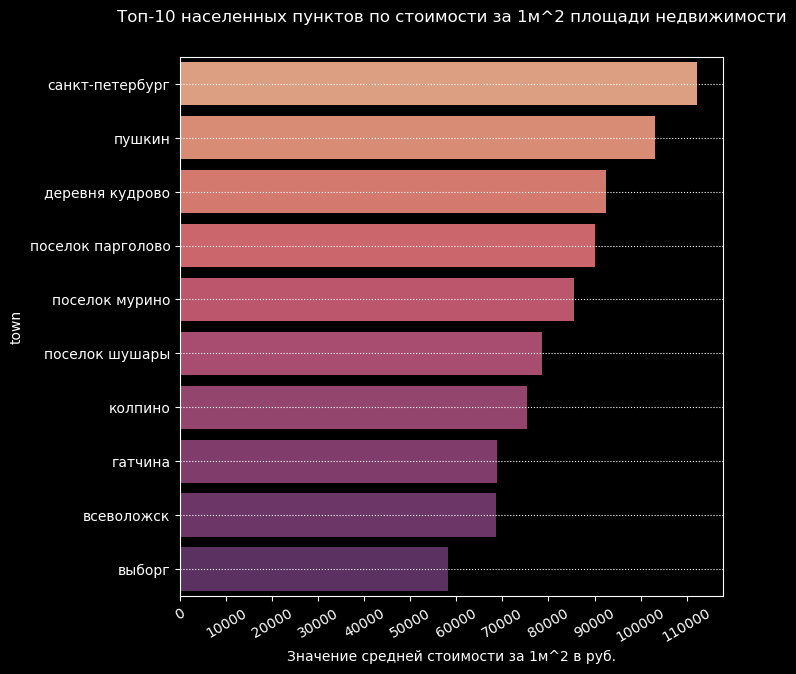

In [117]:
plt.figure(figsize=(7,7))

sns.barplot(
    data=sqm_price_top, 
    x=sqm_price_top['avg_m2_price'], 
    y=sqm_price_top['town'], 
    palette='flare',
    orient='h'
).set(xticks=np.arange(0, 120000, 10000))
plt.title('Топ-10 населенных пунктов по стоимости за 1м^2 площади недвижимости', 
              horizontalalignment='center', y=1.05)
plt.xlabel('Значение средней стоимости за 1м^2 в руб.')
plt.grid(axis='y', linestyle=':')
plt.xticks(rotation=30)
plt.show()

Вполне ожидаемо, что самая большая цена за 1 кв метр в Санкт-Петербугре.

Далее следуют населенные пункты, опоясывающие Санкт-Петербург.

В общем, из этого можно сделать вывод, что чем дальше от центра Санкт-Петербурга, тем меньше нужно платить за кв метр площади квартиры.

Поэтому дополнительно посчитаем **цену за 1 км расстояния в Санкт-Петербурге**

#### Как стоимость объектов зависит от расстояния до центра города?

Для ответа на этот вопрос построим график зависимости цены от расстояния до центра по данным из сводной таблицы

In [118]:
sp_1km_price = data.query('locality_name == "санкт-петербург"').groupby(
    'city_centers_nearest_km').agg({'1m2_price' : 'mean'})
sp_1km_price

,1m2_price
city_centers_nearest_km,
0,165634.333333
1,145081.381143
2,136558.143403
3,118647.349855
4,127479.083432
5,135105.771622
6,140908.540646
7,142087.446970
8,124301.435750


Сводная таблица есть. Построим гистограмму

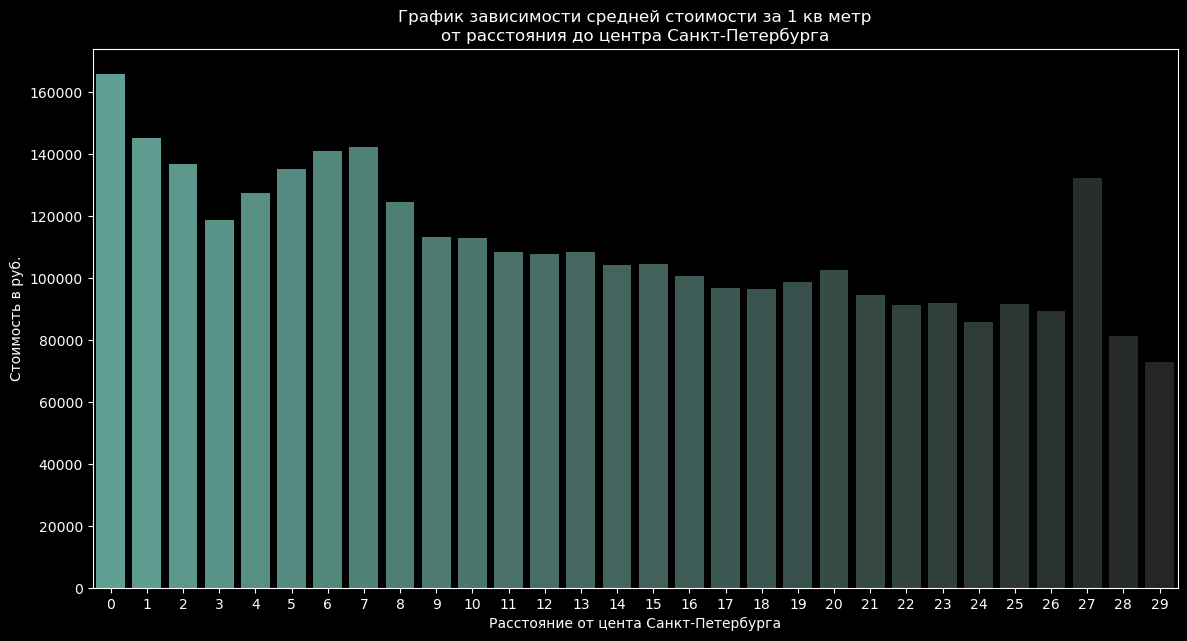

In [119]:
plt.figure(figsize=(14, 7))

sns.barplot(
    x=sp_1km_price.index,
    y=sp_1km_price.loc[:, '1m2_price'],
    palette="dark:#5A9_r"
)

plt.ylabel('Стоимость в руб.')
plt.xlabel('Расстояние от цента Санкт-Петербурга')
plt.title('График зависимости средней стоимости за 1 кв метр\nот расстояния до центра Санкт-Петербурга', horizontalalignment='center')

plt.show()

Итак, при удалении от центра цена за кв метр площади падает.

Пиковые значения вероятно обозначают либо популярные районы в городе, либо окружающие Санкт-Петербург населенные пункты

### Общий вывод 👀

<div style="border: 3px solid rgb(119,212,150); padding: 20px">
Нами был произведен анализ данных сервиса Яндекс.Недвижимость. Данные представляют собой архив объявлений о продаже недвижимости в Санкт-Петербурге и соседних населенных пунктах за период с конца 2014 г. по 2019 г. Результаты исследования будут применены для построения модели, предсказывающей цену недвижимости.

#### Краткая сводка по выполненным задачам

##### 1. Обзор данных, импортирование доп библиотек

* Импортировали необходимые библиотеки

* Исходные данные были загружены и прочитаны. Просмотрена основная информация о них, а также построена общая графическая сводка по всем численным столбцам

##### 2. Предобработка данных

* Переименованы неверно названные столбцы.

    - столбец `city_Centers_nearest` -> `city_centers_nearest`

* Изменен тип данных в некоторых столбцах.

    - тип данных в столбце `first_day_exposition` изменен с `object` -> `datetime64[ns]`
    - тип данных в столбце `floors_total` изменен с `float64` -> `int64`
    - тип данных в столбце `balcony` изменен с `float64` -> `int64`


* Произведена обработка пропущенных значений в столбцах, где это было возможно. Учитывалась специфичность значений каждого из обрабатываемых столбцов для принятия решения об использовании конкретного метода заполнения пропусков.

    - столбец `is_apartment`. Временно заменили пропуски значением `False`;
    - столбец `balcony`. Заменили пропущенные значения на `0`;
    - столбец `ceiling_height`. Пропущенные значения были заменены медианным по тому же населенному пункту;
    - столбец `floors_total`. Пропуски заменили значением из столбца `floor`;
    - столбец `living_area`. Пропуски были заполнены исходя из рассчитанной средней доли жилой площади в квартирах Санкт-Петербурга.
    - столбец `kitchen_area`. Пропуски были заполнены исходя из рассчитанной средней доли площади кухни в квартирах Санкт-Петербурга.
    - столбцы с картографическими данными. Удалено 1 объявление, для заполнения пропусков требуется уточнение информации.


* Устранены неявные дубликаты в названиях городов, населенных пунктов.

    - столбец `locality_name`. Сокращено кол-во уникальных знчений с 364 до 309


* Исправлено распределение значений в некоторых столбцах, удалены аномальные значения.

    - столбец `floors_total`. Удалены объявления с аномальным числом этажей в доме.
    - столбец `ceiling_height`. Исправлено распределение значений: округлили некоторые значения до значения квартилей, отбросили аномальные
    - столбец `total_area`.
    - столбец `last_price`. Удалены слишком дорогие объявления.


##### 3. Добавление столбцов

**Добавлены столбцы:**

- цена одного квадратного метра;

- день недели публикации объявления

- месяц публикации объявления;

- год публикации объявления;

- тип этажа квартиры (значения — «первый», «последний», «другой»);

- расстояние до центра города в километрах.

##### 4. Исследование данных, получение результатов

* Построены гистограммы по численным столбцам, описаны наблюдения, сделаны выводы

* Исследованы следующие вопросы:
    > Как быстро продавались квартиры?

    **Вывод:**
    
    *Скорость продажи квартиры в большистве случаев связана с правилами и сроками размещения объявлений на площадке. Если говорить о конкретных цифрах, то от полутора месяца до трех в среднем.*

    > Какие факторы больше всего влияют на общую стоимость объекта недвижимости?

    **Вывод:**
    
    *В ходе исследования выяснили, что наиболее сильно цена за объект недвижимости зависит от общей площади, жилой площади, площади кухни, кол-ва комнат, а также от расположения объекта относительно центров крупных городов/населенных пунктов.*
    
    *Также на рынке недвижимости присутствует сезонное изменение цен, вероятно связанное с праздничными днями,временем, удобным для проведения ремонта и пр. В масштабе недели пользователи примерно в два раза активнее размещают и просматривают объявления в будние дни, нежели в выходные*

    > Какова средняя стоимость за 1 м<sup>2</sup> в топ-10 населенных пунктов/городов?

    **Вывод:**
    
    *Агрегировав данные, провели визуальный анализ и пришли к выводу, что топ-10 населенных пунктов по числу объявлений и средняя цена за кв метр площади недвижимости в них следующая:*
    
    Санкт-Петербург -> ~112 тыс. руб.
    
    Пушкин -> ~103 тыс. руб.
    
    Деревня Кудрово -> ~92 тыс. руб.
    
    Поселок Парголово -> ~90 тыс. руб.
    
    Поселок Мурино -> ~85 тыс. руб.
    
    Поселок Шушары -> ~78 тыс. руб.
    
    Колпино -> ~75 тыс. руб.
    
    Гатчина -> ~68 тыс. руб.
    
    Всеволожск -> ~68 тыс. руб.
    
    Выборг -> ~58 тыс. руб.
    
    > Как стоимость объекта зависит от расстояния до центра Санкт-Петербурга?

    **Вывод:**
    
    *Согласно построенному графику, цена за кв метр убывает по мере отдаления от центра Санкт-Петербурга. В цифрах, это приблизительно вдвое на каждые 30 км от центра города*

#### Вследствии чего могли быть получены неполноценные результаты?
* Столбцы, с пропущенными значениями, которые возникли либо по причине того, что некоторые данные были некорректно выгружены, либо являются необязательными для указания пользователем.
* Отсутствие возможности в полной мере анализировать связь картографических величин с другими параметрами, по причине большого кол-ва пропущенных значений. Вероятно, что это связано с плохим качеством исполнения системы, которая автоматически рассчитывает эти данные.
* Не слишком понятная документация к некоторым столбцам

#### Рекомендации для дальнейшего исследования
- Использование полученных результатов для создания предиктивной модели машинного обучения, которая на основе неких классификационных признаков оценивает стоимость объекта недвижимости
- Исследовать более актуальные данные используя методы предобработки данных, которые были применены в этом исследовании
- Рассмотреть целесообразность применения альтернативных способов обработки аномалий, дубликатов и пропусков
</div>